## A Study on Different Marital Satisfaction Models Using Data Mining Techniques

| No. | Student ID   | Student Name                                |
|-----|--------------|--------------------------------------------|
| 1   | 1191201569   | Too Yee Shuen                               |
| 2   | 1191201519   | Irfan Daniel Teng Bin Mohd Taufiq Teng      |
| 3   | 1191201664   | Shawn Samsson Gomez                          |


## Import libraries

In [1]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Plotting and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation and Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import chi2_contingency

# Feature Selection and Preprocessing
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Modelling and Machine Learning Algorithm
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Model Evaluation and Selection
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from boruta import BorutaPy
from sklearn.metrics import classification_report, confusion_matrix

# Association Rule Mining
from apyori import apriori

# Other
import math
import warnings
warnings.filterwarnings("ignore")

## Data Pre-Processing

In [2]:
df = pd.read_csv("msr3.csv")
df.head()

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,ms2,ms3,scoll1,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4
0,Brazil,1,21.0,2.0,0,0,5,3,1,4,...,1,1,1,1,1,1,1,1,1,1
1,Brazil,1,29.0,3.0,1,0,5,3,1,2,...,2,2,2,1,1,1,1,1,1,1
2,Brazil,1,30.0,7.0,0,0,5,3,1,4,...,1,1,2,1,2,1,1,1,1,1
3,Brazil,1,30.0,7.0,1,1,5,3,1,2,...,2,2,3,1,1,2,1,1,1,1
4,Brazil,1,28.0,9.0,0,0,4,2,1,3,...,2,1,3,2,3,2,1,1,1,1


In [6]:
# Check the summary statistics of numerical columns
df.describe()

,gender,age,yr_mrr,chd,chda,edu,physio,rel,safety,love4,...,ms2,ms3,scoll1,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,...,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,1.533157,40.665018,14.760102,1.766648,1.466982,4.242965,2.616606,3.962803,3.656729,1.442045,...,2.227919,2.281833,2.492338,1.986486,3.547088,2.683199,2.192254,1.885483,3.398440,2.989412
std,0.498934,11.446824,11.587541,1.307748,1.383066,0.949635,0.838241,1.777629,1.951630,0.804958,...,1.460221,1.494538,1.460362,1.430655,1.819215,1.766169,1.529274,1.470525,1.959335,1.922027
min,1.000000,17.000000,0.080000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,32.000000,5.000000,1.000000,0.000000,4.000000,2.000000,3.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,12.000000,2.000000,1.000000,5.000000,3.000000,4.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000
75%,2.000000,49.000000,23.000000,2.000000,2.000000,5.000000,3.000000,5.000000,5.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,2.000000,5.000000,4.000000
max,2.000000,88.000000,70.000000,12.000000,13.000000,5.000000,6.000000,7.000000,7.000000,6.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
# Check the data types of each column
df.dtypes

country     object
gender       int64
age        float64
yr_mrr     float64
chd          int64
chda         int64
edu          int64
physio       int64
raf         object
rel          int64
safety       int64
love4        int64
happy        int64
esteem2      int64
love5        int64
love3        int64
esteem1      int64
sact         int64
love2        int64
love1        int64
ms1          int64
ms2          int64
ms3          int64
scoll1       int64
scoll2       int64
scoll3       int64
scoll4       int64
icoll1       int64
icoll2       int64
icoll3       int64
icoll4       int64
dtype: object

In [8]:
# Check the number of missing values in each column
df.isnull().sum()

country    0
gender     0
age        0
yr_mrr     0
chd        0
chda       0
edu        0
physio     0
raf        0
rel        0
safety     0
love4      0
happy      0
esteem2    0
love5      0
love3      0
esteem1    0
sact       0
love2      0
love1      0
ms1        0
ms2        0
ms3        0
scoll1     0
scoll2     0
scoll3     0
scoll4     0
icoll1     0
icoll2     0
icoll3     0
icoll4     0
dtype: int64

In [9]:
# Check unique values of raf attributes
unique_values = df['raf'].unique()
unique_values

array(['1', '2', '4', '6', '3', '5', '9', '10', ' ', '7', '11', '12', '8'],
      dtype=object)

In [10]:
# Drop rows with empty string in 'religion' column
df = df[df['raf'] != ' ']

In [11]:
# Drop number 6 from physiological needs to tally with questionnaire answers
df = df[df['physio'] != 6]

In [12]:
df['physio'].unique()

array([3, 2, 1, 4, 5])

## Binning Marital Satisfaction

In [5]:
df['ms1_category'], cut_bin_ms1 = pd.cut(df['ms1'], bins = 3, labels = ['low', 'moderate', 'high'], retbins = True)
df['ms2_category'], cut_bin_ms2 = pd.cut(df['ms2'], bins = 3, labels = ['low', 'moderate', 'high'], retbins = True)
df['ms3_category'], cut_bin_ms3 = pd.cut(df['ms3'], bins = 3, labels = ['low', 'moderate', 'high'], retbins = True)
df

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4,ms1_category,ms2_category,ms3_category
0,Brazil,1,21.0,2.0,0,0,5,3,1,4,...,1,1,1,1,1,1,1,low,low,low
1,Brazil,1,29.0,3.0,1,0,5,3,1,2,...,1,1,1,1,1,1,1,low,low,low
2,Brazil,1,30.0,7.0,0,0,5,3,1,4,...,1,2,1,1,1,1,1,low,low,low
3,Brazil,1,30.0,7.0,1,1,5,3,1,2,...,1,1,2,1,1,1,1,low,low,low
4,Brazil,1,28.0,9.0,0,0,4,2,1,3,...,2,3,2,1,1,1,1,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,Uganda,1,32.0,7.0,2,3,5,1,10,4,...,2,2,7,2,2,2,7,low,low,low
7174,Uganda,1,36.0,6.0,4,4,5,3,,4,...,2,2,3,3,2,1,1,low,low,low
7175,Uganda,1,32.0,2.0,1,1,5,2,,1,...,1,4,2,1,2,4,2,low,low,low
7176,Uganda,1,27.0,3.0,2,2,5,2,,1,...,2,3,4,3,3,2,3,low,low,low


In [14]:
df['ms1_category'].unique()

['low', 'moderate', 'high']
Categories (3, object): ['low' < 'moderate' < 'high']

In [15]:
df['ms2_category'].unique()

['low', 'moderate', 'high']
Categories (3, object): ['low' < 'moderate' < 'high']

In [16]:
df['ms3_category'].unique()

['low', 'moderate', 'high']
Categories (3, object): ['low' < 'moderate' < 'high']

In [17]:
# Get the number of rows
total_rows = df.shape[0]

# Print the total number of rows
print("Total rows:", total_rows)

Total rows: 7080


## Exploratory Data Analysis

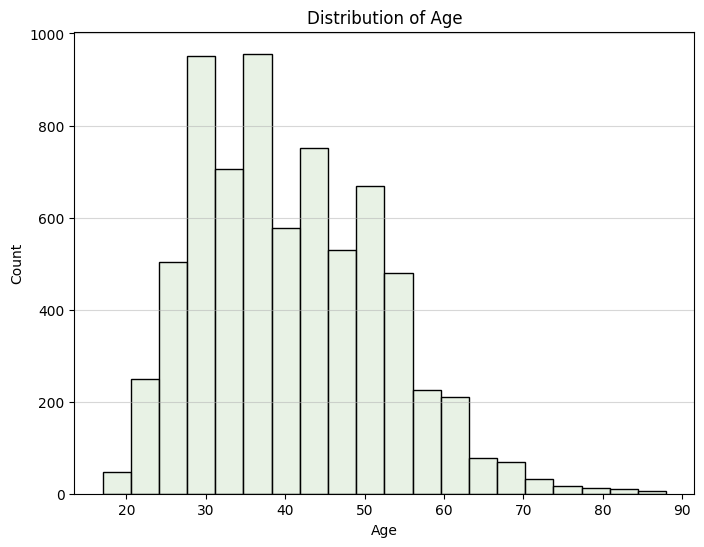

In [18]:
# Figure size
plt.figure(figsize=(8, 6))

# Plot the histogram of age with bin size 10
sns.histplot(data=df, x='age', bins=20, color='#E1EEDD')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Gridlines
plt.grid(axis='y', alpha=0.5)

# Display plot
plt.show()


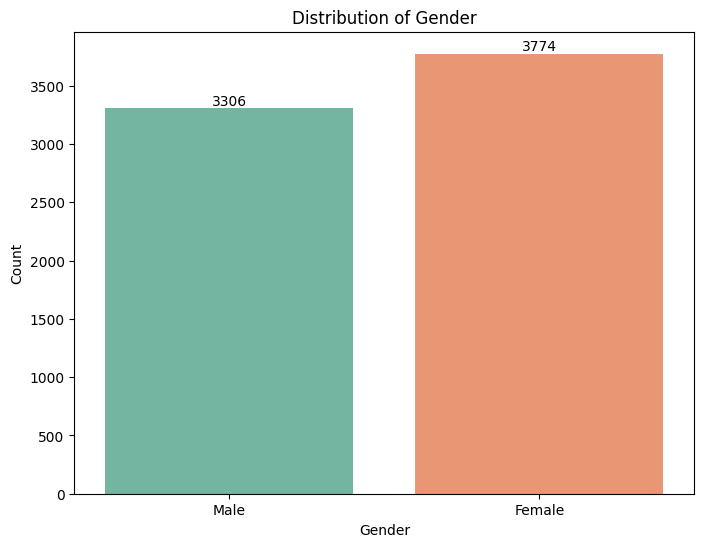

In [19]:
# Mapping dictionary for gender
gender_mapping = {1: 'Male', 2: 'Female'}

plt.figure(figsize=(8, 6))

# Plot the count of gender with the mapped values
ax = sns.countplot(data=df, x=df['gender'].map(gender_mapping), palette='Set2')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Annotations
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.show()


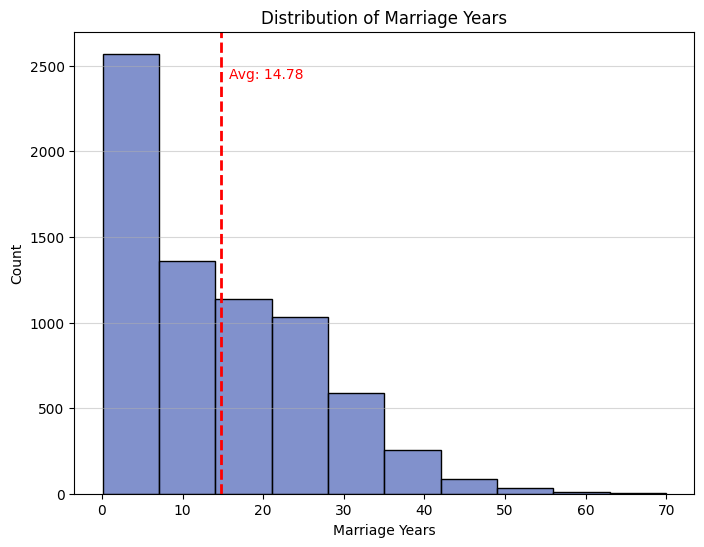

In [20]:
plt.figure(figsize=(8, 6))

# Histogram of marriage years
sns.histplot(data=df, x='yr_mrr', bins=10, color='#576CBC')

plt.xlabel('Marriage Years')
plt.ylabel('Count')
plt.title('Distribution of Marriage Years')

# Gridlines
plt.grid(axis='y', alpha=0.5)

# Vertical line for the average marriage years
average_yr_mrr = df['yr_mrr'].mean()
plt.axvline(average_yr_mrr, color='red', linestyle='--', linewidth=2, label='Average')

# Text annotation for the average marriage years
plt.text(average_yr_mrr + 1, plt.ylim()[1] * 0.9, f'Avg: {average_yr_mrr:.2f}', color='red')

# X-axis ticks
plt.xticks(range(0, 80, 10))

# Display plot
plt.show()


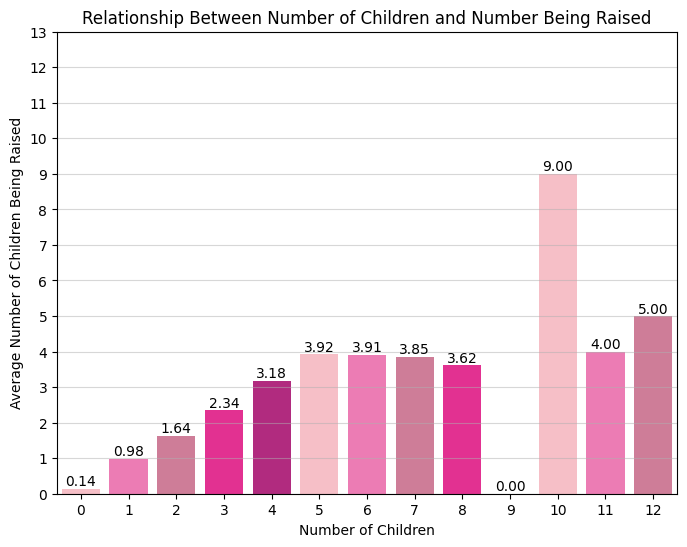

In [21]:
plt.figure(figsize=(8, 6))

# Group the data by 'children count' and calculate average 'children being raised count' for each group
grouped_data = df.groupby('chd')['chda'].mean().reset_index()

# Create bar plot
colors = ['#FFB6C1', '#FF69B4', '#DB7093', '#FF1493', '#C71585']
sns.barplot(data=grouped_data, x='chd', y='chda', palette=colors)

plt.xlabel('Number of Children')
plt.ylabel('Average Number of Children Being Raised')
plt.title('Relationship Between Number of Children and Number Being Raised')

# Data labels
for index, row in grouped_data.iterrows():
    plt.text(row['chd'], row['chda'], f"{row['chda']:.2f}", ha='center', va='bottom', color='black')

# Customize plot appearance
plt.xticks(range(len(grouped_data['chd'])), grouped_data['chd'])
plt.yticks(range(0, int(df['chda'].max()) + 1))
plt.grid(axis='y', alpha=0.5)

# Display plot
plt.show()


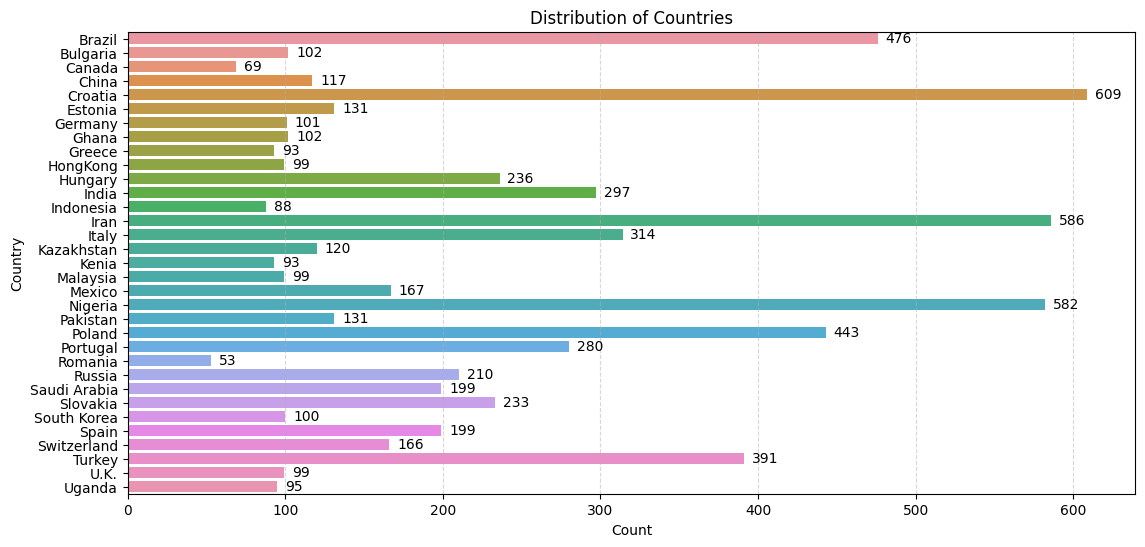

In [22]:
plt.figure(figsize=(13, 6))

# Plot count of countries
sns.countplot(data=df, y='country')

plt.title('Distribution of Countries')
plt.xlabel('Count')
plt.ylabel('Country')

# Horizontal Grid
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Data Labels
for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().annotate(f'{int(width)}', (width + 5, p.get_y() + p.get_height() / 2),
                       ha='left', va='center')
# Display the plot
plt.show()


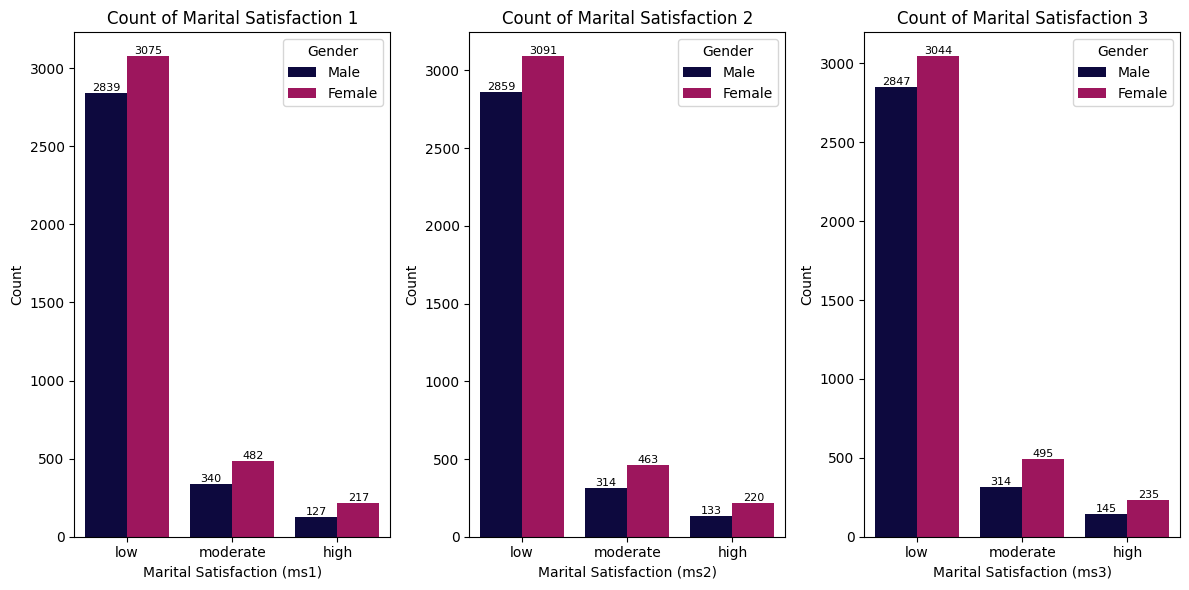

In [23]:
colors = ['#060047', '#B3005E']
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='ms1_category', hue=df['gender'].map(gender_mapping), palette=colors)
plt.xlabel('Marital Satisfaction (ms1)')
plt.ylabel('Count')
plt.title('Count of Marital Satisfaction 1')
plt.legend(title='Gender')

# Annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', color='black', fontsize=8)

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='ms2_category', hue=df['gender'].map(gender_mapping), palette=colors)
plt.xlabel('Marital Satisfaction (ms2)')
plt.ylabel('Count')
plt.title('Count of Marital Satisfaction 2')
plt.legend(title='Gender')

# Annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', color='black', fontsize=8)

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='ms3_category', hue=df['gender'].map(gender_mapping), palette=colors)
plt.xlabel('Marital Satisfaction (ms3)')
plt.ylabel('Count')
plt.title('Count of Marital Satisfaction 3')
plt.legend(title='Gender')

# Annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', color='black', fontsize=8)

plt.tight_layout()
plt.show()


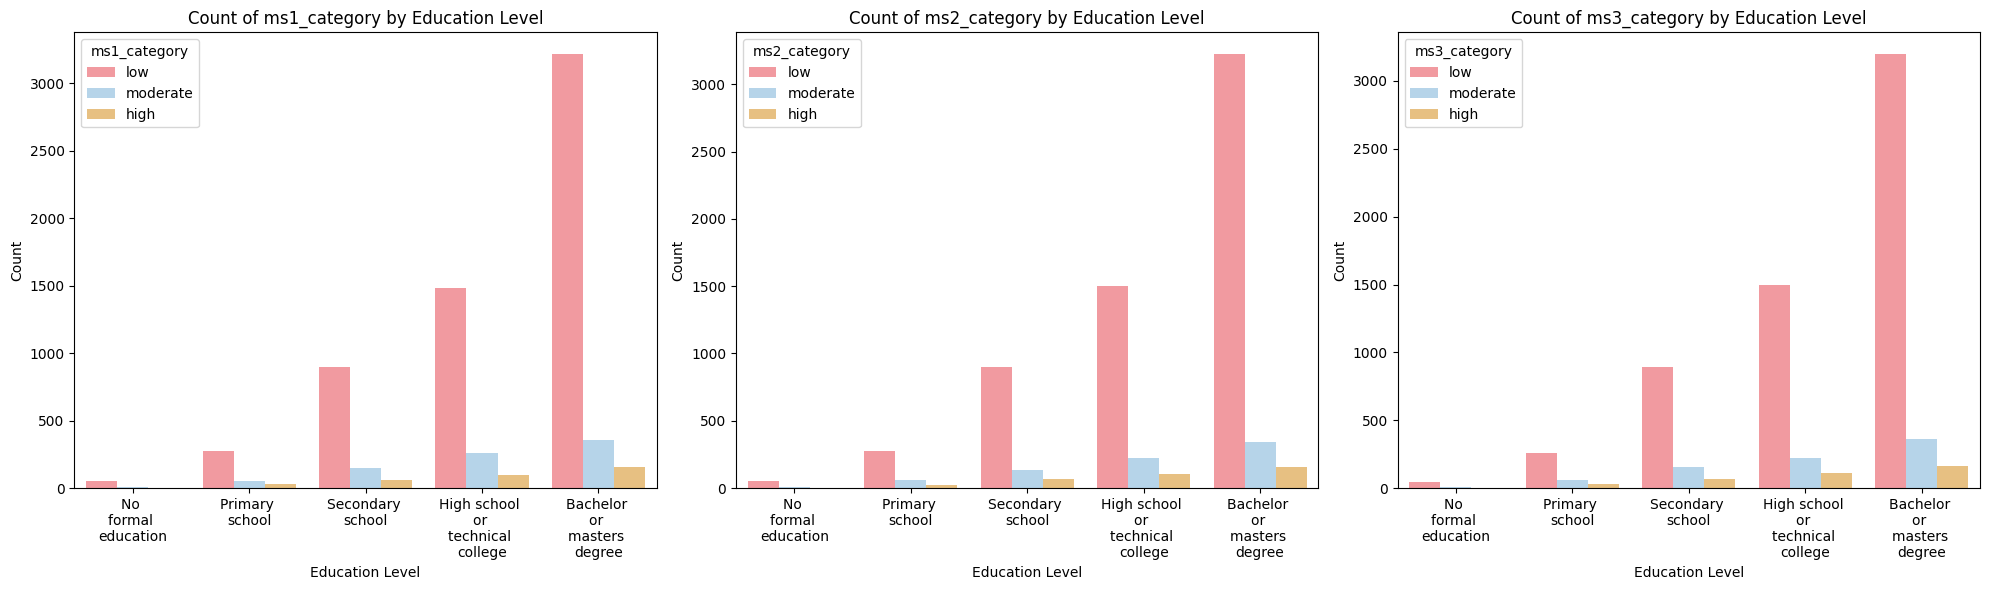

In [24]:
# Mapping dictionary for education level
education_mapping = {1: 'No formal education', 2: 'Primary school', 3: 'Secondary school', 4: 'High school or technical college', 5: 'Bachelor or masters degree'}

# Categories of marital satisfaction
categories = ['ms1_category', 'ms2_category', 'ms3_category']

colors = ['#FF8C94', '#AED6F1', '#F8C471']

# Subplots for each category
fig, axes = plt.subplots(1, len(categories), figsize=(20, 6))

for i, category in enumerate(categories):
    education_count = df.groupby(['edu', category]).size().unstack()

    # Plot count of marital satisfaction by education level
    ax = axes[i]
    sns.countplot(data=df, x='edu', hue=category, palette=colors, order=[1, 2, 3, 4, 5], ax=ax)
    ax.set_xlabel('Education Level')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of {category} by Education Level')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['No \nformal \neducation', 'Primary \nschool', 'Secondary \nschool', 'High school \nor \ntechnical \ncollege', 'Bachelor \nor \nmasters \ndegree'])

# Spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


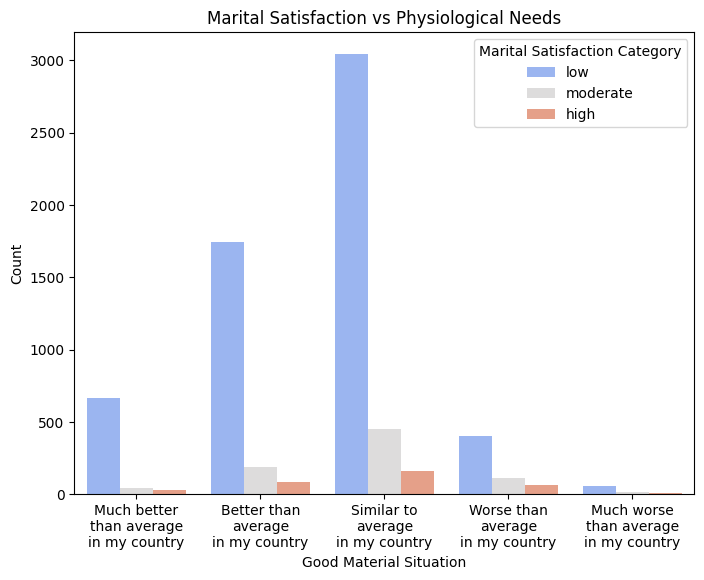

In [25]:
# Define the labels for the physio categories
physio_labels = [
    'Much better\nthan average\nin my country',
    'Better than\naverage\nin my country',
    'Similar to\naverage\nin my country',
    'Worse than\naverage\nin my country',
    'Much worse\nthan average\nin my country'
]

# Plot the count of marital satisfaction by physio needs
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='physio', hue='ms1_category', palette='coolwarm')
plt.xlabel('Good Material Situation')
plt.ylabel('Count')
plt.title('Marital Satisfaction vs Physiological Needs')

# Set custom tick labels for the x-axis
plt.xticks(range(5), physio_labels)

# Show the legend
plt.legend(title='Marital Satisfaction Category')

# Display the plot
plt.show()


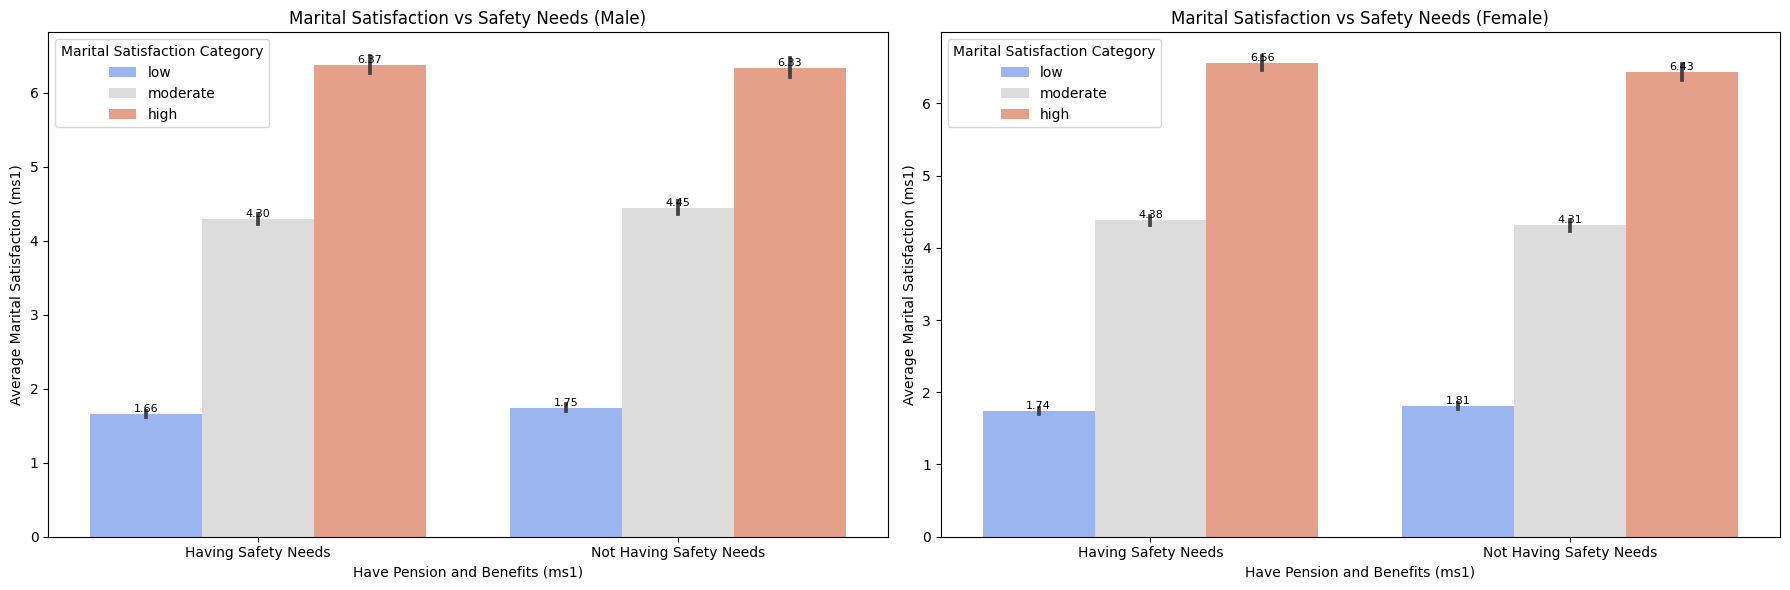

In [26]:
# Bins and labels for safety needs
safety_bins = [1, 4, 7]
safety_labels = ['Having Safety Needs', 'Not Having Safety Needs']

# Subplots for male and female
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the average marital satisfaction by safety needs for male
sns.barplot(data=df[df['gender'] == 1], x=pd.cut(df[df['gender'] == 1]['safety'], bins=safety_bins, labels=safety_labels, right=False), y='ms1', hue='ms1_category', palette='coolwarm', ax=axes[0])
axes[0].set_xlabel('Have Pension and Benefits (ms1)')
axes[0].set_ylabel('Average Marital Satisfaction (ms1)')
axes[0].set_title('Marital Satisfaction vs Safety Needs (Male)')
axes[0].legend(title='Marital Satisfaction Category')

# Add average annotations for male
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)

# Plot the average marital satisfaction by safety needs for female
sns.barplot(data=df[df['gender'] == 2], x=pd.cut(df[df['gender'] == 2]['safety'], bins=safety_bins, labels=safety_labels, right=False), y='ms1', hue='ms1_category', palette='coolwarm', ax=axes[1])
axes[1].set_xlabel('Have Pension and Benefits (ms1)')
axes[1].set_ylabel('Average Marital Satisfaction (ms1)')
axes[1].set_title('Marital Satisfaction vs Safety Needs (Female)')
axes[1].legend(title='Marital Satisfaction Category')

# Add average annotations for female
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)

# Adjust the layout of subplots
plt.tight_layout()

# Display the plot
plt.show()


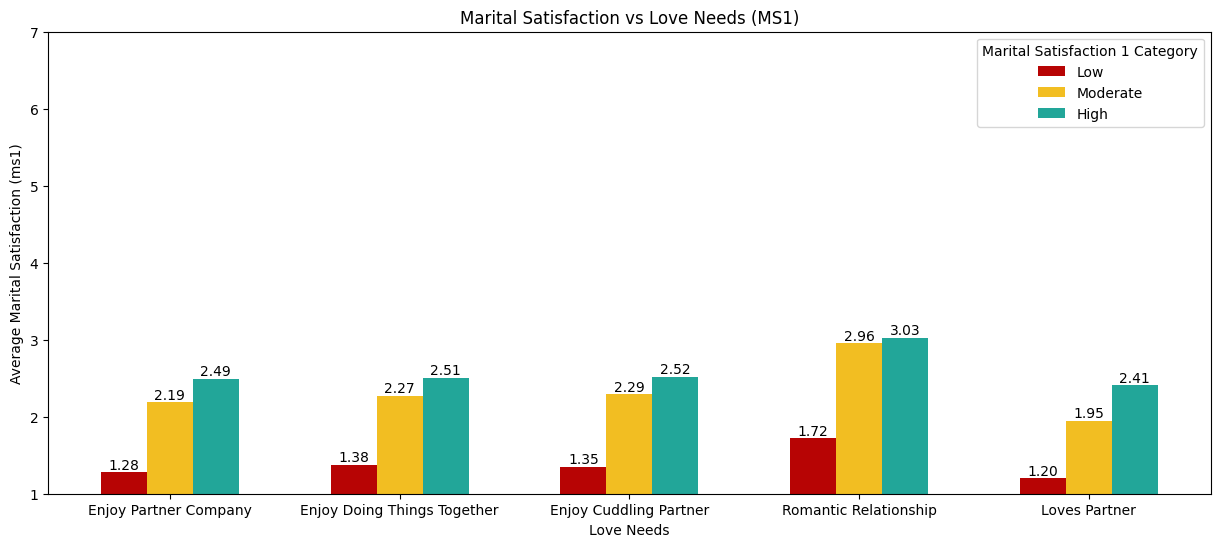

In [27]:
# Love Needs
love_columns = ['love4', 'love5', 'love3', 'love2', 'love1']
love_labels = ['Enjoy Partner Company', 'Enjoy Doing Things Together', 'Enjoy Cuddling Partner', 'Romantic Relationship', 'Loves Partner']

# Calculate the average marital satisfaction for each love need
love_avg_satisfaction = df.groupby('ms1_category')[love_columns].mean()

bar_width = 0.2

# Bar positions
positions_low = np.arange(len(love_columns))
positions_moderate = positions_low + bar_width
positions_high = positions_low + 2*bar_width

colors = ['#B70404', '#F2BE22', '#22A699']

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(positions_low, love_avg_satisfaction.loc['low'], width=bar_width, label='Low', color=colors[0])
plt.bar(positions_moderate, love_avg_satisfaction.loc['moderate'], width=bar_width, label='Moderate', color=colors[1])
plt.bar(positions_high, love_avg_satisfaction.loc['high'], width=bar_width, label='High', color=colors[2])

# Annotations
for i, pos in enumerate(positions_low):
    plt.annotate(f'{love_avg_satisfaction.loc["low"].values[i]:.2f}', (pos, love_avg_satisfaction.loc['low'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{love_avg_satisfaction.loc["moderate"].values[i]:.2f}', (pos + bar_width, love_avg_satisfaction.loc['moderate'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{love_avg_satisfaction.loc["high"].values[i]:.2f}', (pos + 2*bar_width, love_avg_satisfaction.loc['high'].values[i]), ha='center', va='bottom')

plt.xlabel('Love Needs')
plt.ylabel('Average Marital Satisfaction (ms1)')
plt.title('Marital Satisfaction vs Love Needs (MS1)')
plt.xticks(positions_moderate, love_labels)
plt.ylim(1, 7)  # Set the y-axis limits to the love scale range
plt.legend(title='Marital Satisfaction 1 Category')

plt.show()


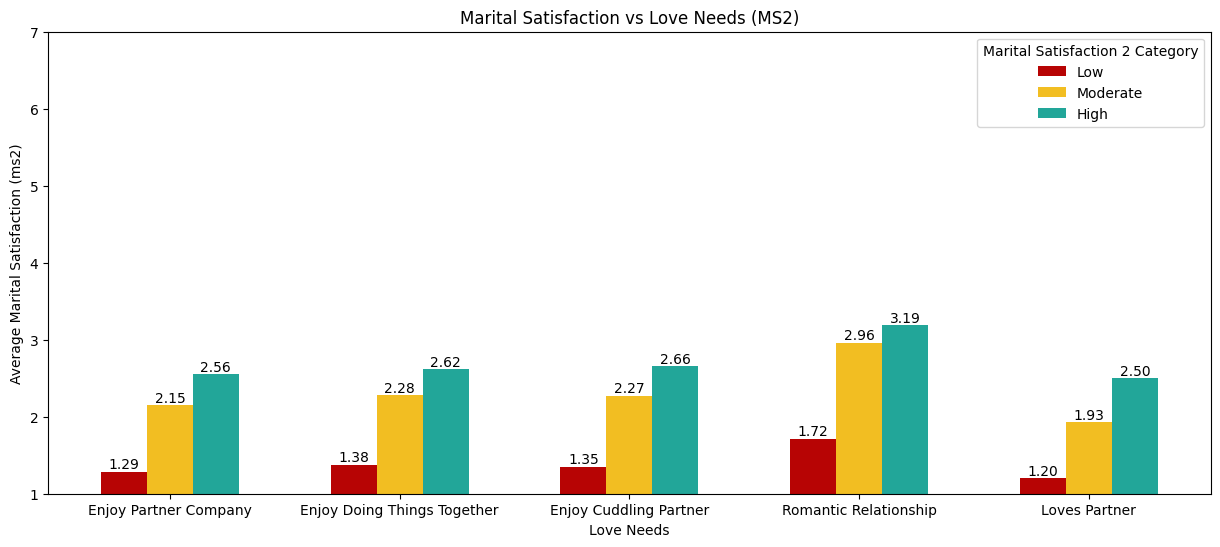

In [28]:
# Love Needs
love_columns = ['love4', 'love5', 'love3', 'love2', 'love1']
love_labels = ['Enjoy Partner Company', 'Enjoy Doing Things Together', 'Enjoy Cuddling Partner', 'Romantic Relationship', 'Loves Partner']

# Calculate the average marital satisfaction for each love need
love_avg_satisfaction = df.groupby('ms2_category')[love_columns].mean()

bar_width = 0.2

# Bar positions
positions_low = np.arange(len(love_columns))
positions_moderate = positions_low + bar_width
positions_high = positions_low + 2*bar_width

colors = ['#B70404', '#F2BE22', '#22A699']

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(positions_low, love_avg_satisfaction.loc['low'], width=bar_width, label='Low', color=colors[0])
plt.bar(positions_moderate, love_avg_satisfaction.loc['moderate'], width=bar_width, label='Moderate', color=colors[1])
plt.bar(positions_high, love_avg_satisfaction.loc['high'], width=bar_width, label='High', color=colors[2])

# Annotations
for i, pos in enumerate(positions_low):
    plt.annotate(f'{love_avg_satisfaction.loc["low"].values[i]:.2f}', (pos, love_avg_satisfaction.loc['low'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{love_avg_satisfaction.loc["moderate"].values[i]:.2f}', (pos + bar_width, love_avg_satisfaction.loc['moderate'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{love_avg_satisfaction.loc["high"].values[i]:.2f}', (pos + 2*bar_width, love_avg_satisfaction.loc['high'].values[i]), ha='center', va='bottom')

plt.xlabel('Love Needs')
plt.ylabel('Average Marital Satisfaction (ms2)')
plt.title('Marital Satisfaction vs Love Needs (MS2)')
plt.xticks(positions_moderate, love_labels)
plt.ylim(1, 7)  # Set the y-axis limits to the love scale range
plt.legend(title='Marital Satisfaction 2 Category')

plt.show()


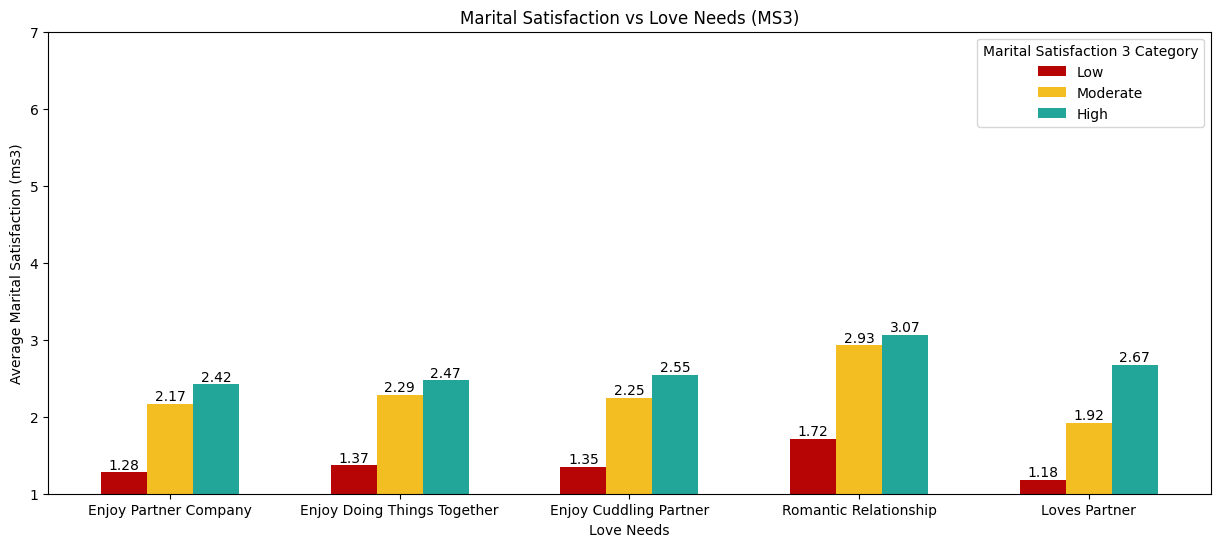

In [29]:
# Love Needs
love_columns = ['love4', 'love5', 'love3', 'love2', 'love1']
love_labels = ['Enjoy Partner Company', 'Enjoy Doing Things Together', 'Enjoy Cuddling Partner', 'Romantic Relationship', 'Loves Partner']

# Calculate the average marital satisfaction for each love need
love_avg_satisfaction = df.groupby('ms3_category')[love_columns].mean()

bar_width = 0.2

# Bar positions
positions_low = np.arange(len(love_columns))
positions_moderate = positions_low + bar_width
positions_high = positions_low + 2*bar_width

colors = ['#B70404', '#F2BE22', '#22A699']

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(positions_low, love_avg_satisfaction.loc['low'], width=bar_width, label='Low', color=colors[0])
plt.bar(positions_moderate, love_avg_satisfaction.loc['moderate'], width=bar_width, label='Moderate', color=colors[1])
plt.bar(positions_high, love_avg_satisfaction.loc['high'], width=bar_width, label='High', color=colors[2])

# Annotations
for i, pos in enumerate(positions_low):
    plt.annotate(f'{love_avg_satisfaction.loc["low"].values[i]:.2f}', (pos, love_avg_satisfaction.loc['low'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{love_avg_satisfaction.loc["moderate"].values[i]:.2f}', (pos + bar_width, love_avg_satisfaction.loc['moderate'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{love_avg_satisfaction.loc["high"].values[i]:.2f}', (pos + 2*bar_width, love_avg_satisfaction.loc['high'].values[i]), ha='center', va='bottom')

plt.xlabel('Love Needs')
plt.ylabel('Average Marital Satisfaction (ms3)')
plt.title('Marital Satisfaction vs Love Needs (MS3)')
plt.xticks(positions_moderate, love_labels)
plt.ylim(1, 7)  # Set the y-axis limits to the love scale range
plt.legend(title='Marital Satisfaction 3 Category')

plt.show()


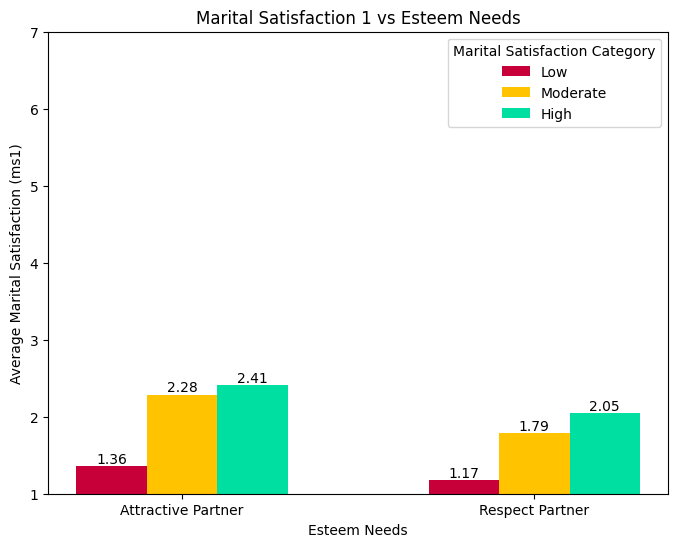

In [30]:
# Esteem Needs
esteem_columns = ['esteem2', 'esteem1']
esteem_labels = ['Attractive Partner', 'Respect Partner']

# Calculate the average marital satisfaction for each esteem need
esteem_avg_satisfaction = df.groupby('ms1_category')[esteem_columns].mean()

bar_width = 0.2

# Bar positions
positions_low = np.arange(len(esteem_columns))
positions_moderate = positions_low + bar_width
positions_high = positions_low + 2*bar_width

# Define custom colors for the bars
colors = ['#C70039', '#FFC300', '#00DFA2']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(positions_low, esteem_avg_satisfaction.loc['low'], width=bar_width, label='Low', color=colors[0])
plt.bar(positions_moderate, esteem_avg_satisfaction.loc['moderate'], width=bar_width, label='Moderate', color=colors[1])
plt.bar(positions_high, esteem_avg_satisfaction.loc['high'], width=bar_width, label='High', color=colors[2])

# Annotations
for i, pos in enumerate(positions_low):
    plt.annotate(f'{esteem_avg_satisfaction.loc["low"].values[i]:.2f}', (pos, esteem_avg_satisfaction.loc['low'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{esteem_avg_satisfaction.loc["moderate"].values[i]:.2f}', (pos + bar_width, esteem_avg_satisfaction.loc['moderate'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{esteem_avg_satisfaction.loc["high"].values[i]:.2f}', (pos + 2*bar_width, esteem_avg_satisfaction.loc['high'].values[i]), ha='center', va='bottom')

plt.xlabel('Esteem Needs')
plt.ylabel('Average Marital Satisfaction (ms1)')
plt.title('Marital Satisfaction 1 vs Esteem Needs')
plt.xticks(positions_moderate, esteem_labels)
plt.ylim(1, 7)  # Set the y-axis limits to the esteem scale range
plt.legend(title='Marital Satisfaction Category')

plt.show()


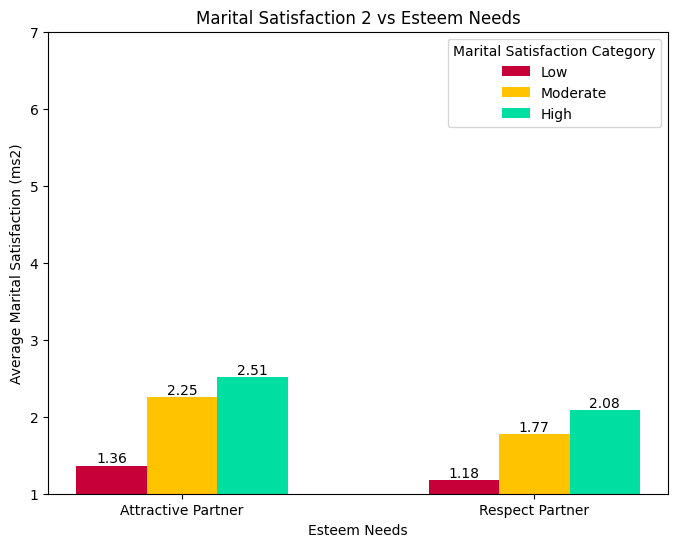

In [31]:
# Calculate the average marital satisfaction for each esteem need
esteem_avg_satisfaction = df.groupby('ms2_category')[esteem_columns].mean()

bar_width = 0.2

# Bar positions
positions_low = np.arange(len(esteem_columns))
positions_moderate = positions_low + bar_width
positions_high = positions_low + 2*bar_width

# Define custom colors for the bars
colors = ['#C70039', '#FFC300', '#00DFA2']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(positions_low, esteem_avg_satisfaction.loc['low'], width=bar_width, label='Low', color=colors[0])
plt.bar(positions_moderate, esteem_avg_satisfaction.loc['moderate'], width=bar_width, label='Moderate', color=colors[1])
plt.bar(positions_high, esteem_avg_satisfaction.loc['high'], width=bar_width, label='High', color=colors[2])

# Annotations
for i, pos in enumerate(positions_low):
    plt.annotate(f'{esteem_avg_satisfaction.loc["low"].values[i]:.2f}', (pos, esteem_avg_satisfaction.loc['low'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{esteem_avg_satisfaction.loc["moderate"].values[i]:.2f}', (pos + bar_width, esteem_avg_satisfaction.loc['moderate'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{esteem_avg_satisfaction.loc["high"].values[i]:.2f}', (pos + 2*bar_width, esteem_avg_satisfaction.loc['high'].values[i]), ha='center', va='bottom')

plt.xlabel('Esteem Needs')
plt.ylabel('Average Marital Satisfaction (ms2)')
plt.title('Marital Satisfaction 2 vs Esteem Needs')
plt.xticks(positions_moderate, esteem_labels)
plt.ylim(1, 7)  # Set the y-axis limits to the esteem scale range
plt.legend(title='Marital Satisfaction Category')

plt.show()

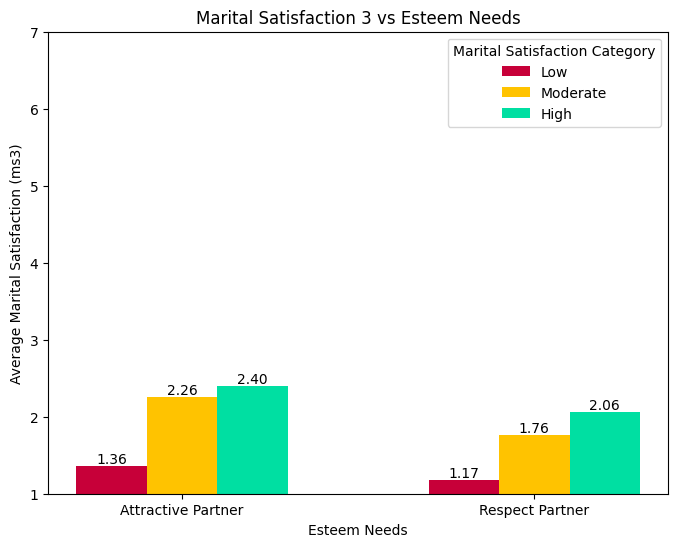

In [32]:
# Calculate the average marital satisfaction for each esteem need
esteem_avg_satisfaction = df.groupby('ms3_category')[esteem_columns].mean()

bar_width = 0.2

# Bar positions
positions_low = np.arange(len(esteem_columns))
positions_moderate = positions_low + bar_width
positions_high = positions_low + 2*bar_width

# Define custom colors for the bars
colors = ['#C70039', '#FFC300', '#00DFA2']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(positions_low, esteem_avg_satisfaction.loc['low'], width=bar_width, label='Low', color=colors[0])
plt.bar(positions_moderate, esteem_avg_satisfaction.loc['moderate'], width=bar_width, label='Moderate', color=colors[1])
plt.bar(positions_high, esteem_avg_satisfaction.loc['high'], width=bar_width, label='High', color=colors[2])

# Annotations
for i, pos in enumerate(positions_low):
    plt.annotate(f'{esteem_avg_satisfaction.loc["low"].values[i]:.2f}', (pos, esteem_avg_satisfaction.loc['low'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{esteem_avg_satisfaction.loc["moderate"].values[i]:.2f}', (pos + bar_width, esteem_avg_satisfaction.loc['moderate'].values[i]), ha='center', va='bottom')
    plt.annotate(f'{esteem_avg_satisfaction.loc["high"].values[i]:.2f}', (pos + 2*bar_width, esteem_avg_satisfaction.loc['high'].values[i]), ha='center', va='bottom')

plt.xlabel('Esteem Needs')
plt.ylabel('Average Marital Satisfaction (ms3)')
plt.title('Marital Satisfaction 3 vs Esteem Needs')
plt.xticks(positions_moderate, esteem_labels)
plt.ylim(1, 7)  # Set the y-axis limits to the esteem scale range
plt.legend(title='Marital Satisfaction Category')

plt.show()

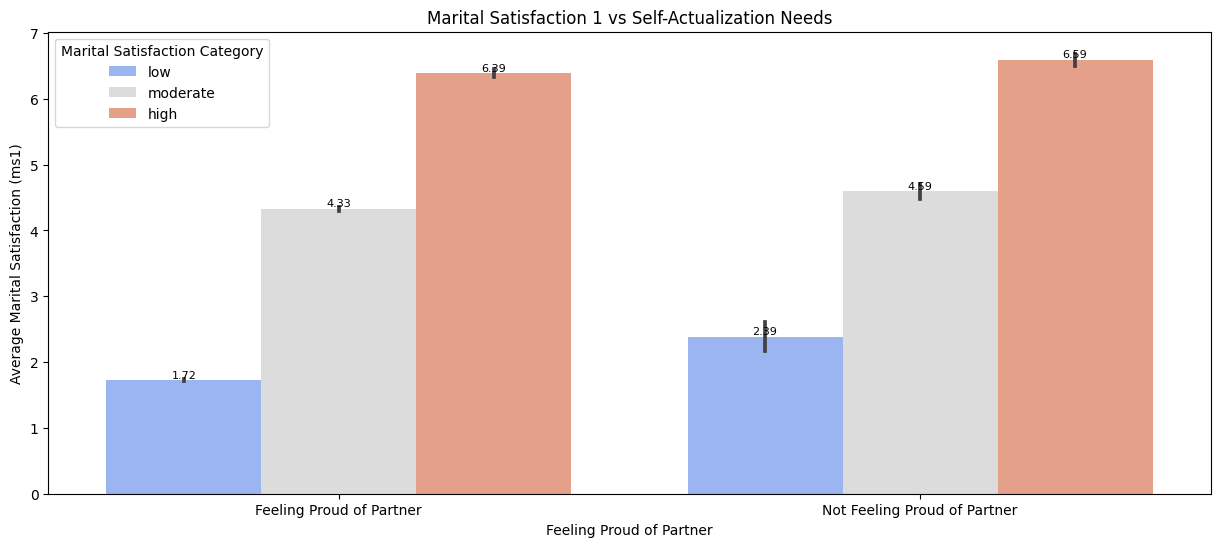

In [33]:
# Bins and labels for self-actualization needs
sact_bins = [1, 4, 7]
sact_labels = ['Feeling Proud of Partner', 'Not Feeling Proud of Partner']

# Plot the average marital satisfaction by self-actualization needs
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x=pd.cut(df['sact'], bins=sact_bins, labels=sact_labels, right=False), y='ms1', hue='ms1_category', palette='coolwarm')

# Add average annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xlabel('Feeling Proud of Partner')
plt.ylabel('Average Marital Satisfaction (ms1)')
plt.title('Marital Satisfaction 1 vs Self-Actualization Needs')
plt.legend(title='Marital Satisfaction Category')

# Display the plot
plt.show()


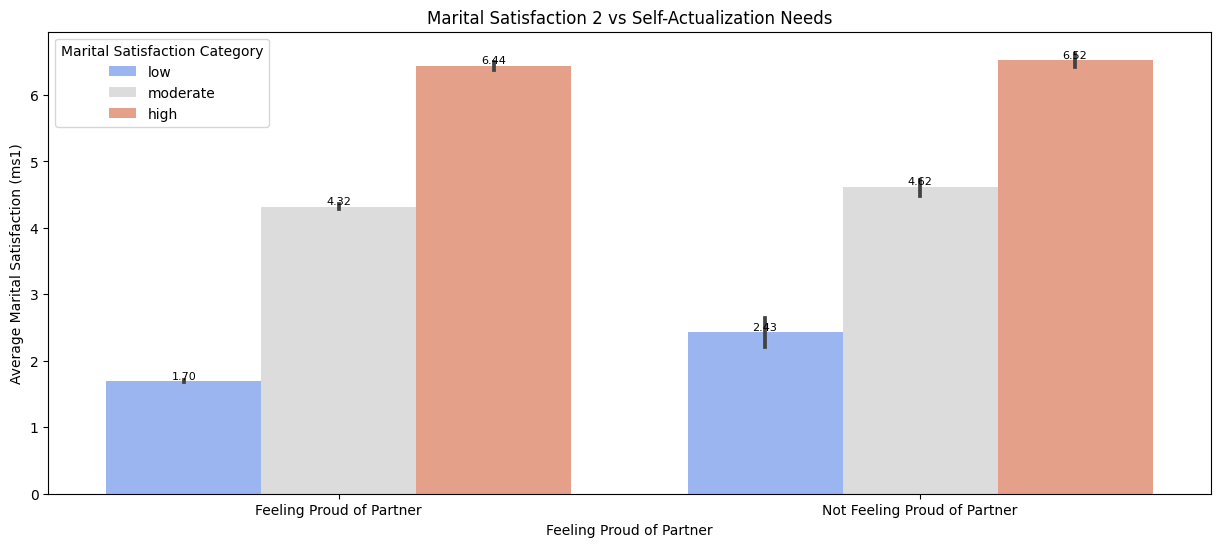

In [34]:
# Plot the average marital satisfaction by self-actualization needs
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x=pd.cut(df['sact'], bins=sact_bins, labels=sact_labels, right=False), y='ms2', hue='ms2_category', palette='coolwarm')

# Add average annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xlabel('Feeling Proud of Partner')
plt.ylabel('Average Marital Satisfaction (ms1)')
plt.title('Marital Satisfaction 2 vs Self-Actualization Needs')
plt.legend(title='Marital Satisfaction Category')

# Display the plot
plt.show()

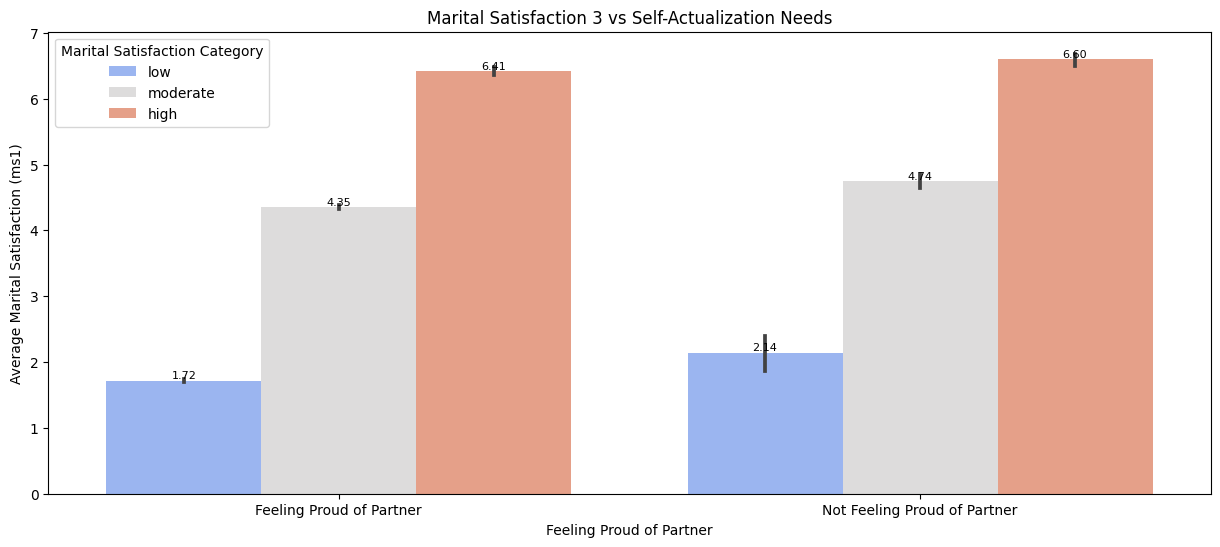

In [35]:
# Plot the average marital satisfaction by self-actualization needs
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x=pd.cut(df['sact'], bins=sact_bins, labels=sact_labels, right=False), y='ms3', hue='ms3_category', palette='coolwarm')

# Add average annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xlabel('Feeling Proud of Partner')
plt.ylabel('Average Marital Satisfaction (ms1)')
plt.title('Marital Satisfaction 3 vs Self-Actualization Needs')
plt.legend(title='Marital Satisfaction Category')

# Display the plot
plt.show()

### Correlation Matrix

In [17]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

In [18]:
top_corr = correlation_matrix.unstack().sort_values(ascending=False)
top_corr = top_corr[top_corr != 1][::2][:5]
print(top_corr)

ms1     ms2       0.889306
ms2     ms3       0.881832
age     yr_mrr    0.879498
ms3     ms1       0.854192
icoll1  icoll2    0.687181
dtype: float64


#### Heat map

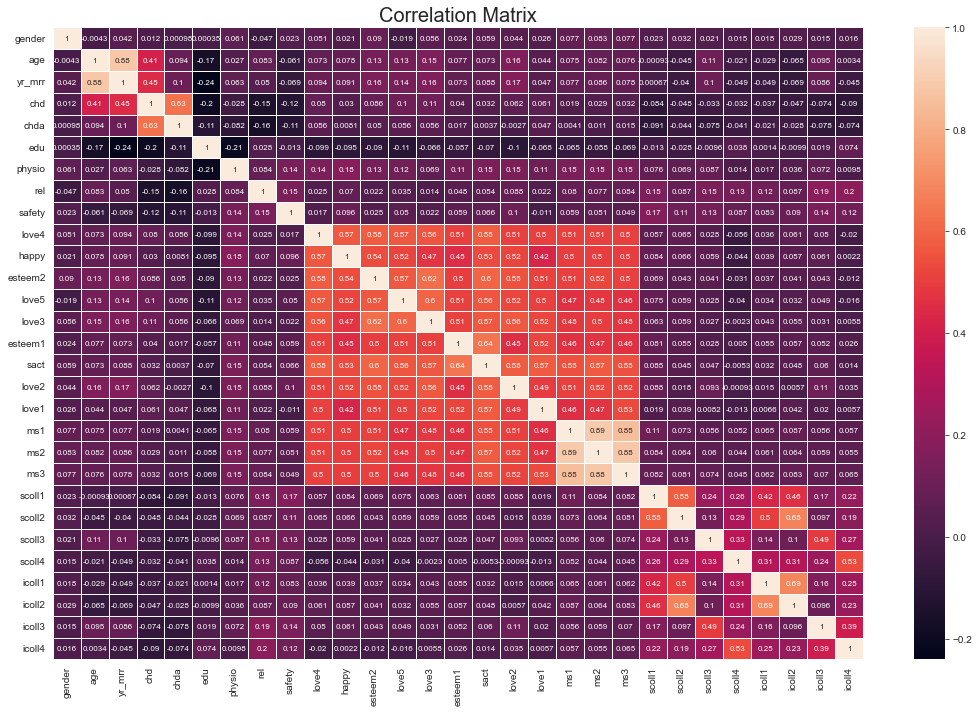

In [20]:
sns.set_style('white')

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, annot_kws={'fontsize': 8}, linewidths=0.5)

plt.title('Correlation Matrix', fontsize=20)
plt.tight_layout()

plt.show()

## Cluster Analysis

In [7]:
df2 = df.copy()
df2

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4,ms1_category,ms2_category,ms3_category
0,Brazil,1,21.0,2.0,0,0,5,3,1,4,...,1,1,1,1,1,1,1,low,low,low
1,Brazil,1,29.0,3.0,1,0,5,3,1,2,...,1,1,1,1,1,1,1,low,low,low
2,Brazil,1,30.0,7.0,0,0,5,3,1,4,...,1,2,1,1,1,1,1,low,low,low
3,Brazil,1,30.0,7.0,1,1,5,3,1,2,...,1,1,2,1,1,1,1,low,low,low
4,Brazil,1,28.0,9.0,0,0,4,2,1,3,...,2,3,2,1,1,1,1,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,Uganda,1,32.0,7.0,2,3,5,1,10,4,...,2,2,7,2,2,2,7,low,low,low
7174,Uganda,1,36.0,6.0,4,4,5,3,,4,...,2,2,3,3,2,1,1,low,low,low
7175,Uganda,1,32.0,2.0,1,1,5,2,,1,...,1,4,2,1,2,4,2,low,low,low
7176,Uganda,1,27.0,3.0,2,2,5,2,,1,...,2,3,4,3,3,2,3,low,low,low


In [8]:
X_cluster= df2.drop(['ms1','ms2','ms3', 'ms1_category', 'ms2_category', 'ms3_category'], axis=1)
y_ms1 = df2['ms1']
y_ms2 = df2['ms2']
y_ms3 = df2['ms3']

In [9]:
# dummification of variables

X_cluster = pd.get_dummies(X_cluster, drop_first=True)
X_cluster.columns

Index(['gender', 'age', 'yr_mrr', 'chd', 'chda', 'edu', 'physio', 'rel',
       'safety', 'love4', 'happy', 'esteem2', 'love5', 'love3', 'esteem1',
       'sact', 'love2', 'love1', 'scoll1', 'scoll2', 'scoll3', 'scoll4',
       'icoll1', 'icoll2', 'icoll3', 'icoll4', 'country_Bulgaria',
       'country_Canada', 'country_China', 'country_Croatia', 'country_Estonia',
       'country_Germany', 'country_Ghana', 'country_Greece',
       'country_HongKong', 'country_Hungary', 'country_India',
       'country_Indonesia', 'country_Iran', 'country_Italy',
       'country_Kazakhstan', 'country_Kenia', 'country_Malaysia',
       'country_Mexico', 'country_Nigeria', 'country_Pakistan',
       'country_Poland', 'country_Portugal', 'country_Romania',
       'country_Russia', 'country_Saudi Arabia', 'country_Slovakia',
       'country_South Korea', 'country_Spain', 'country_Switzerland',
       'country_Turkey', 'country_U.K.', 'country_Uganda', 'raf_1', 'raf_10',
       'raf_11', 'raf_12', 'raf_2', 

<AxesSubplot:xlabel='age', ylabel='yr_mrr'>

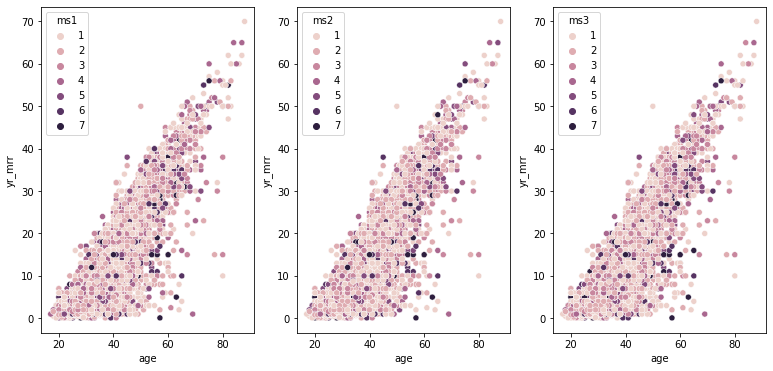

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(13,6))

sns.scatterplot(x="age", y="yr_mrr", hue="ms1", data=df2, ax=axes[0])
sns.scatterplot(x="age", y="yr_mrr", hue="ms2", data=df2, ax=axes[1])
sns.scatterplot(x="age", y="yr_mrr", hue="ms3", data=df2, ax=axes[2])

In [11]:
# Number of clusters that will be used
k = 3

# K-means clustering for ms1
kmeans_ms1 = KMeans(n_clusters=k)
kmeans_ms1.fit(X_cluster)
cluster_labels_ms1 = kmeans_ms1.labels_
cluster_centroids_ms1 = kmeans_ms1.cluster_centers_

# K-means clustering for ms2
kmeans_ms2 = KMeans(n_clusters=k)
kmeans_ms2.fit(X_cluster)
cluster_labels_ms2 = kmeans_ms2.labels_
cluster_centroids_ms2 = kmeans_ms2.cluster_centers_

# K-means clustering for ms3
kmeans_ms3 = KMeans(n_clusters=k)
kmeans_ms3.fit(X_cluster)
cluster_labels_ms3 = kmeans_ms3.labels_
cluster_centroids_ms3 = kmeans_ms3.cluster_centers_

<AxesSubplot:xlabel='age', ylabel='yr_mrr'>

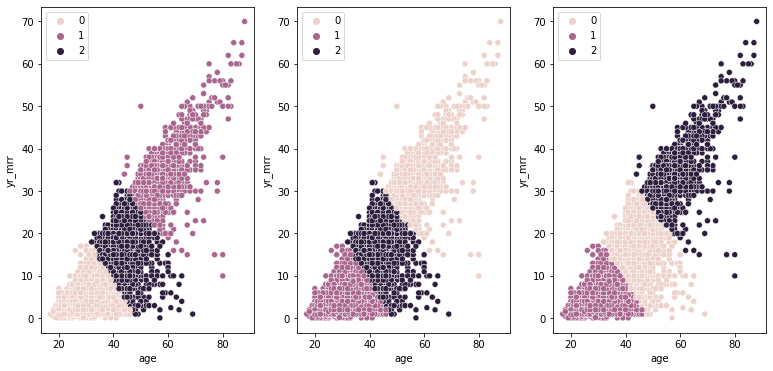

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(13,6))

sns.scatterplot(x="age", y="yr_mrr", hue=cluster_labels_ms1, data=df2, ax=axes[0])
sns.scatterplot(x="age", y="yr_mrr", hue=cluster_labels_ms2, data=df2, ax=axes[1])
sns.scatterplot(x="age", y="yr_mrr", hue=cluster_labels_ms3, data=df2, ax=axes[2])

In [13]:
# Calculate silhouette score for ms1
silhouette_avg_ms1 = silhouette_score(X_cluster, cluster_labels_ms1)

# Calculate silhouette score for ms2
silhouette_avg_ms2 = silhouette_score(X_cluster, cluster_labels_ms2)

# Calculate silhouette score for ms3
silhouette_avg_ms3 = silhouette_score(X_cluster, cluster_labels_ms3)

In [14]:
# Analyze cluster characteristics for ms1
cluster_data_ms1 = pd.concat([X_cluster, pd.DataFrame(cluster_labels_ms1, columns=['Cluster'])], axis=1)
cluster_characteristics_ms1 = cluster_data_ms1.groupby('Cluster').mean()

# Analyze cluster characteristics for ms2
cluster_data_ms2 = pd.concat([X_cluster, pd.DataFrame(cluster_labels_ms2, columns=['Cluster'])], axis=1)
cluster_characteristics_ms2 = cluster_data_ms2.groupby('Cluster').mean()

# Analyze cluster characteristics for ms3
cluster_data_ms3 = pd.concat([X_cluster, pd.DataFrame(cluster_labels_ms3, columns=['Cluster'])], axis=1)
cluster_characteristics_ms3 = cluster_data_ms3.groupby('Cluster').mean()

In [15]:
# Print the silhoutte results
print("\nSilhouette Score for ms1:", silhouette_avg_ms1)
print()
print("\nSilhouette Score for ms2:", silhouette_avg_ms2)
print()
print("\nSilhouette Score for ms3:", silhouette_avg_ms3)
print()


Silhouette Score for ms1: 0.3478148005381108


Silhouette Score for ms2: 0.3478148005381108


Silhouette Score for ms3: 0.3478148005381108



In [45]:
# Print the cluster characteristics results
print("Cluster Characteristics for ms1:")
print(cluster_characteristics_ms1)
print("\nCluster Characteristics for ms2:")
print(cluster_characteristics_ms2)
print("\nCluster Characteristics for ms3:")
print(cluster_characteristics_ms3)

Cluster Characteristics for ms1:
           gender        age     yr_mrr       chd      chda       edu  \
Cluster                                                                 
0.0      1.525318  39.105002  13.268960  1.679714  1.421559  4.300404   
1.0      1.554340  43.307805  17.624092  1.814734  1.393873  4.132020   
2.0      1.536728  41.521703  15.447308  1.819282  1.494574  4.238731   

           physio       rel    safety     love4  ...    raf_11    raf_12  \
Cluster                                          ...                       
0.0      2.548618  3.964585  3.642125  1.434607  ...  0.076732  0.057161   
1.0      2.681255  4.040117  3.741065  1.439825  ...  0.047411  0.016047   
2.0      2.655676  3.962437  3.628130  1.452003  ...  0.057179  0.018364   

            raf_2     raf_3     raf_4     raf_5     raf_6     raf_7     raf_8  \
Cluster                                                                         
0.0      0.295123  0.007145  0.228642  0.010873  0.161852 

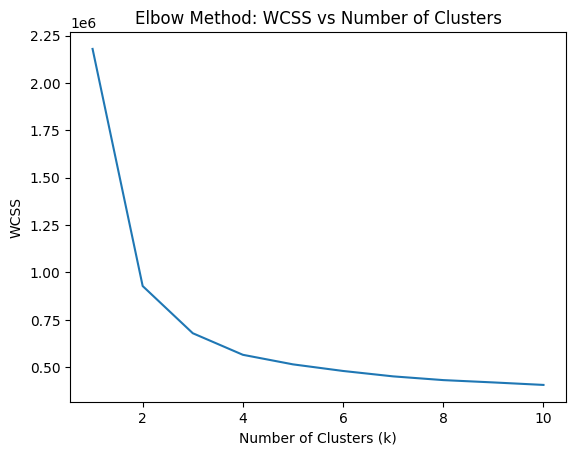

In [46]:
# Calculate WCSS for different values of k
wcss = []
max_k = 10  # Maximum value of k to consider

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Plot WCSS values
plt.plot(range(1, max_k + 1), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method: WCSS vs Number of Clusters')
plt.show()

## Association Rule Mining

### Pre-process for Physiological Needs, Safety Needs, Love Needs, Esteem Needs, Self Actualization Needs



In [47]:
df3 = df.copy()
df3.head()

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4,ms1_category,ms2_category,ms3_category
0,Brazil,1,21.0,2.0,0,0,5,3,1,4,...,1,1,1,1,1,1,1,low,low,low
1,Brazil,1,29.0,3.0,1,0,5,3,1,2,...,1,1,1,1,1,1,1,low,low,low
2,Brazil,1,30.0,7.0,0,0,5,3,1,4,...,1,2,1,1,1,1,1,low,low,low
3,Brazil,1,30.0,7.0,1,1,5,3,1,2,...,1,1,2,1,1,1,1,low,low,low
4,Brazil,1,28.0,9.0,0,0,4,2,1,3,...,2,3,2,1,1,1,1,low,low,low


In [48]:
# Bin 'yr_mrr' into 2-year intervals (Marriage Years)
df3['yr_mrr_bin'] = df3['yr_mrr'].apply(lambda x: f"{math.floor(x/2)*2}-{math.floor(x/2)*2+1} years married")

print(df3[['yr_mrr', 'yr_mrr_bin']].head())

   yr_mrr         yr_mrr_bin
0     2.0  2-3 years married
1     3.0  2-3 years married
2     7.0  6-7 years married
3     7.0  6-7 years married
4     9.0  8-9 years married


In [49]:
df3.drop(["age", "yr_mrr", "raf", "chd", "chda", "ms1", "ms2", "ms3", "happy", "rel", "country", "gender", "edu", "scoll1", "scoll2", "scoll3", "scoll4", "icoll1", "icoll2", "icoll3", "icoll4"], axis=1, inplace=True)

In [50]:
def bin_variable(value, scale):
    if scale == 'onepositive_sevenscale':
        if value <= 2:
            return 'High'
        elif value <= 4:
            return 'Moderate'
        else:
            return 'Low'
    elif scale == 'onepositive_fivescale':
        if value <= 2:
            return 'High'
        elif value == 3:
            return 'Moderate'
        else:
            return 'Low'

# Bin scales
scales = {
    #Physiological Needs
    'physio': 'onepositive_fivescale', # Good Material Situation?

    #Safety Needs
    'safety': 'onepositive_sevenscale', # Have Pension and Benefits?

    #Love Needs
    'love4': 'onepositive_fivescale', # Enjoy Partner Company?
    'love5': 'onepositive_fivescale', # Enjoy Doing Things w Partner?
    'love3': 'onepositive_fivescale', # Enjoy Cuddling Partner?
    'love2': 'onepositive_fivescale', # Romantic Relationship?
    'love1': 'onepositive_fivescale', # Love Partner?

    #Esteem Needs
    'esteem2': 'onepositive_fivescale', # Attractive Partner?
    'esteem1': 'onepositive_fivescale', # Respect Partner?

    #Self Actualization Needs
    'sact': 'onepositive_fivescale', # Proud of Partner?

}

for column, scale in scales.items():
    if scale is not None:
        df3[column] = df3[column].apply(lambda x: bin_variable(x, scale))

# Verify the changes
df3.head()


,physio,safety,love4,esteem2,love5,love3,esteem1,sact,love2,love1,ms1_category,ms2_category,ms3_category,yr_mrr_bin
0,Moderate,Moderate,High,High,High,High,High,High,High,High,low,low,low,2-3 years married
1,Moderate,Low,High,High,High,High,High,High,High,High,low,low,low,2-3 years married
2,Moderate,Moderate,High,High,High,High,High,High,Moderate,High,low,low,low,6-7 years married
3,Moderate,Low,High,High,High,High,High,High,High,High,low,low,low,6-7 years married
4,High,Low,High,High,High,High,High,High,High,High,low,low,low,8-9 years married


In [51]:
# Replace binned values for result readability

#Physiological Needs
df3['physio'].replace({"High": 'Better than Average Material Situation',
                       "Moderate": 'Average Material Situation',
                       "Low": 'Worse than Average Material Situation'}, inplace=True)

#Safety Needs
df3['safety'].replace({"High": 'Acquire Safety Needs',
                       "Moderate": 'Moderate Safety Needs',
                       "Low": 'Does not Acquire Safety Needs'}, inplace=True)

##Love Needs
df3['love4'].replace({"High": 'Enjoy Partner Company',
                      "Moderate": 'Neither enjoy or hates Partner Company',
                      "Low": 'Does not enjoy Partner Company'}, inplace=True)

df3['love5'].replace({"High": 'Enjoy doing things with Partner',
                      "Moderate": 'Neither enjoy or hates doing things with Partner',
                      "Low": 'Does not enjoy doing things with Partner'}, inplace=True)

df3['love3'].replace({"High": 'Enjoy cuddling with Partner',
                      "Moderate": 'Neither enjoy or hates cuddling with Partner',
                      "Low": 'Does not enjoy cuddling with Partner'}, inplace=True)

df3['love2'].replace({"High": 'Has a romantic relationship',
                      "Moderate": 'Neither has a romantic or platonic relationship',
                      "Low": 'Do not have a romantic relationship'}, inplace=True)

df3['love1'].replace({"High": 'Loves Partner',
                      "Moderate": 'Neither love or hate partner',
                      "Low": 'Does not love partner'}, inplace=True)

#Esteem Needs
df3['esteem2'].replace({"High": 'Thinks Partner is Attractive',
                        "Moderate": 'Thinks Partner is Neither Attractive or Unattractive',
                        "Low": 'Thinks Partner is Not Attractive'}, inplace=True)

df3['esteem1'].replace({"High": 'Respects Partner',
                        "Moderate": 'Neither respect or disrespect Partner',
                        "Low": 'Does not respect Partner'}, inplace=True)

#Self Actualization Needs
df3['sact'].replace({"High": 'Proud of Partner',
                     "Moderate": 'Neither Proud or not Proud of Partner',
                     "Low": 'Not proud of Partner'}, inplace=True)

df3

,physio,safety,love4,esteem2,love5,love3,esteem1,sact,love2,love1,ms1_category,ms2_category,ms3_category,yr_mrr_bin
0,Average Material Situation,Moderate Safety Needs,Enjoy Partner Company,Thinks Partner is Attractive,Enjoy doing things with Partner,Enjoy cuddling with Partner,Respects Partner,Proud of Partner,Has a romantic relationship,Loves Partner,low,low,low,2-3 years married
1,Average Material Situation,Does not Acquire Safety Needs,Enjoy Partner Company,Thinks Partner is Attractive,Enjoy doing things with Partner,Enjoy cuddling with Partner,Respects Partner,Proud of Partner,Has a romantic relationship,Loves Partner,low,low,low,2-3 years married
2,Average Material Situation,Moderate Safety Needs,Enjoy Partner Company,Thinks Partner is Attractive,Enjoy doing things with Partner,Enjoy cuddling with Partner,Respects Partner,Proud of Partner,Neither has a romantic or platonic relationship,Loves Partner,low,low,low,6-7 years married
3,Average Material Situation,Does not Acquire Safety Needs,Enjoy Partner Company,Thinks Partner is Attractive,Enjoy doing things with Partner,Enjoy cuddling with Partner,Respects Partner,Proud of Partner,Has a romantic relationship,Loves Partner,low,low,low,6-7 years married
4,Better than Average Material Situation,Does not Acquire Safety Needs,Enjoy Partner Company,Thinks Partner is Attractive,Enjoy doing things with Partner,Enjoy cuddling with Partner,Respects Partner,Proud of Partner,Has a romantic relationship,Loves Partner,low,low,low,8-9 years married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,Average Material Situation,Moderate Safety Needs,Neither enjoy or hates Partner Company,Thinks Partner is Neither Attractive or Unattr...,Enjoy doing things with Partner,Neither enjoy or hates cuddling with Partner,Respects Partner,Proud of Partner,Do not have a romantic relationship,Loves Partner,moderate,moderate,moderate,4-5 years married
7170,Average Material Situation,Does not Acquire Safety Needs,Enjoy Partner Company,Thinks Partner is Attractive,Enjoy doing things with Partner,Enjoy cuddling with Partner,Respects Partner,Proud of Partner,Has a romantic relationship,Loves Partner,low,low,low,2-3 years married
7171,Better than Average Material Situation,Does not Acquire Safety Needs,Enjoy Partner Company,Thinks Partner is Attractive,Enjoy doing things with Partner,Enjoy cuddling with Partner,Respects Partner,Proud of Partner,Has a romantic relationship,Loves Partner,low,low,low,14-15 years married
7172,Better than Average Material Situation,Moderate Safety Needs,Enjoy Partner Company,Thinks Partner is Attractive,Enjoy doing things with Partner,Enjoy cuddling with Partner,Respects Partner,Proud of Partner,Has a romantic relationship,Loves Partner,low,low,low,4-5 years married


In [52]:
missing_values = df3.isnull().sum()
print("Number of missing values:\n", missing_values)

Number of missing values:
 physio          0
safety          0
love4           0
esteem2         0
love5           0
love3           0
esteem1         0
sact            0
love2           0
love1           0
ms1_category    0
ms2_category    0
ms3_category    0
yr_mrr_bin      0
dtype: int64


In [53]:
ms1_high = df3[df3["ms1_category"] == "high"].drop(columns=["ms2_category", "ms3_category"])
ms2_high = df3[df3["ms2_category"] == "high"].drop(columns=["ms1_category", "ms3_category"])
ms3_high = df3[df3["ms3_category"] == "high"].drop(columns=["ms1_category", "ms2_category"])

### Association Rule Mining Function

In [54]:
def find_highest_rules(data):
    records = []
    for i in range(len(data)):
        records.append([str(data.values[i, j]) for j in range(len(data.columns))])

    association_rules = apriori(records, min_support=0.04, min_confidence=0.2, min_lift=3, min_length=2)
    association_results = list(association_rules)

    highest_support_rule = None
    highest_support = 0.0
    highest_support_confidence = 0.0
    highest_support_lift = 0.0

    highest_confidence_rule = None
    highest_confidence = 0.0
    highest_confidence_support = 0.0
    highest_confidence_lift = 0.0

    highest_lift_rule = None
    highest_lift = 0.0
    highest_lift_support = 0.0
    highest_lift_confidence = 0.0

    for item in association_results:
        pair = item[0]
        items = [x for x in pair]

        support = round(item[1], 3)
        confidence = round(item[2][0][2], 4)
        lift = round(item[2][0][3], 4)

        if support > highest_support:
            highest_support = support
            highest_support_rule = items
            highest_support_confidence = confidence
            highest_support_lift = lift

        if confidence > highest_confidence:
            highest_confidence = confidence
            highest_confidence_rule = items
            highest_confidence_support = support
            highest_confidence_lift = lift

        if lift > highest_lift:
            highest_lift = lift
            highest_lift_rule = items
            highest_lift_support = support
            highest_lift_confidence = confidence

    print("Highest Support Rule:")
    for item in highest_support_rule:
        print(item)
    print("Support: " + str(highest_support))
    print("Confidence: " + str(highest_support_confidence))
    print("Lift: " + str(highest_support_lift))
    print("===========================")

    print("Highest Confidence Rule:")
    for item in highest_confidence_rule:
        print(item)
    print("Support: " + str(highest_confidence_support))
    print("Confidence: " + str(highest_confidence))
    print("Lift: " + str(highest_confidence_lift))
    print("===========================")

    print("Highest Lift Rule:")
    for item in highest_lift_rule:
        print(item)
    print("Support: " + str(highest_lift_support))
    print("Confidence: " + str(highest_lift_confidence))
    print("Lift: " + str(highest_lift))
    print("===========================")


### MS1 - ARM

In [55]:
find_highest_rules(ms1_high)

Highest Support Rule:
Does not respect Partner
Not proud of Partner
Support: 0.148
Confidence: 0.9107
Lift: 3.1968
Highest Confidence Rule:
Does not enjoy doing things with Partner
Moderate Safety Needs
Not proud of Partner
Does not enjoy Partner Company
Support: 0.041
Confidence: 0.9333
Lift: 3.4523
Highest Lift Rule:
Does not enjoy doing things with Partner
Does not love partner
Does not Acquire Safety Needs
Does not enjoy Partner Company
Do not have a romantic relationship
Does not respect Partner
Support: 0.044
Confidence: 0.2679
Lift: 5.4202


### MS2 - ARM

In [56]:
find_highest_rules(ms2_high)

Highest Support Rule:
Do not have a romantic relationship
Does not respect Partner
Not proud of Partner
Support: 0.144
Confidence: 0.85
Lift: 3.0617
Highest Confidence Rule:
Enjoy Partner Company
Has a romantic relationship
Proud of Partner
4-5 years married
Loves Partner
Support: 0.045
Confidence: 1.0
Lift: 3.0696
Highest Lift Rule:
Neither enjoy or hates cuddling with Partner
Neither Proud or not Proud of Partner
Neither enjoy or hates doing things with Partner
Support: 0.042
Confidence: 0.3
Lift: 5.5737


### MS3 - ARM

In [57]:
find_highest_rules(ms3_high)

Highest Support Rule:
Not proud of Partner
Does not enjoy cuddling with Partner
Does not enjoy Partner Company
Support: 0.142
Confidence: 0.5934
Lift: 3.1319
Highest Confidence Rule:
Enjoy Partner Company
Has a romantic relationship
Thinks Partner is Attractive
Enjoy doing things with Partner
Proud of Partner
4-5 years married
Loves Partner
Support: 0.047
Confidence: 1.0
Lift: 3.0159
Highest Lift Rule:
Enjoy Partner Company
Does not love partner
Has a romantic relationship
Thinks Partner is Attractive
Proud of Partner
Acquire Safety Needs
Support: 0.042
Confidence: 0.2667
Lift: 5.6296


## Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [59]:
#col_list = [col for col in df_FS.columns.tolist() if df[col].dtype.name == "object"]
col_list = [col for col in df.columns.tolist() if df[col].dtype.name in ['object', 'category']]

# Perform label encoding
label_encoder = LabelEncoder()
for column in col_list :
    df[column] = label_encoder.fit_transform(df[column])

In [60]:
df

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4,ms1_category,ms2_category,ms3_category
0,0,1,21.0,2.0,0,0,5,3,0,4,...,1,1,1,1,1,1,1,1,1,1
1,0,1,29.0,3.0,1,0,5,3,0,2,...,1,1,1,1,1,1,1,1,1,1
2,0,1,30.0,7.0,0,0,5,3,0,4,...,1,2,1,1,1,1,1,1,1,1
3,0,1,30.0,7.0,1,1,5,3,0,2,...,1,1,2,1,1,1,1,1,1,1
4,0,1,28.0,9.0,0,0,4,2,0,3,...,2,3,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,32,1,35.0,5.0,2,2,4,3,1,3,...,2,1,2,1,1,1,2,2,2,2
7170,32,1,27.0,2.0,1,1,3,3,1,1,...,2,2,2,1,2,2,2,1,1,1
7171,32,1,33.0,15.0,3,3,5,2,1,1,...,1,6,6,2,2,2,2,1,1,1
7172,32,1,32.0,4.0,2,4,5,2,1,2,...,1,3,3,1,1,3,3,1,1,1


## 5 Classification Model

In [61]:
# Boruta Function

def select_features(X, y):
    rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", max_depth=5)
    feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
    feat_selector.fit(X.values, y.values.ravel())

    boruta_scores = ranking(list(map(float, feat_selector.ranking_)), X.columns, order=-1)
    boruta_scores = pd.DataFrame(list(boruta_scores.items()), columns=['Features', 'Score'])
    boruta_scores = boruta_scores.sort_values("Score", ascending=False)

    return boruta_scores

In [62]:
# 5 Classification Model Function

def create_model(X_train, y_train, model_type):
    if model_type == 'Naive Bayes':
        model = GaussianNB()
    elif model_type == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_type == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=1)
    elif model_type == 'SVM':
        model = SVC(kernel='rbf', probability=True)
    elif model_type == 'Neural Network':
        model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=1)
    else:
        raise ValueError("Invalid model type.")

    model.fit(X_train, y_train)
    return model

In [63]:
# Evaluate Model Function

def evaluate_model(model, X_test, y_test):
    # Predict the test results
    y_pred = model.predict(X_test)

    # Calculate the overall accuracy on the test set
    accuracy = model.score(X_test, y_test)
    print("Accuracy on test set: {:.3f}".format(accuracy))

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1 Score: {:.3f}".format(f1))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [64]:
# Empty lists for storing accuracies
ms1_accuracies = []
ms2_accuracies = []
ms3_accuracies = []

### MS1

In [65]:
# Prepare data for MS1
X = df.drop(['ms1','ms2','ms3','ms1_category','ms2_category','ms3_category'], axis=1)
y = df["ms1_category"]

In [66]:
# Select features using Boruta
msone_boruta_score = select_features(X, y)

print('---------Top 10 MS1 Score----------')
display(msone_boruta_score.head(10))

print('\n---------Bottom 10 MS1 Score----------')
display(msone_boruta_score.tail(10))

---------Top 10 MS1 Score----------


,Features,Score
0,country,1.0
11,love4,1.0
23,scoll4,1.0
19,love1,1.0
18,love2,1.0
17,sact,1.0
16,esteem1,1.0
15,love3,1.0
13,esteem2,1.0
12,happy,1.0



---------Bottom 10 MS1 Score----------


,Features,Score
22,scoll3,0.56
27,icoll4,0.50
21,scoll2,0.44
8,raf,0.38
4,chd,0.31
5,chda,0.25
6,edu,0.19
10,safety,0.19
26,icoll3,0.06
1,gender,0.00


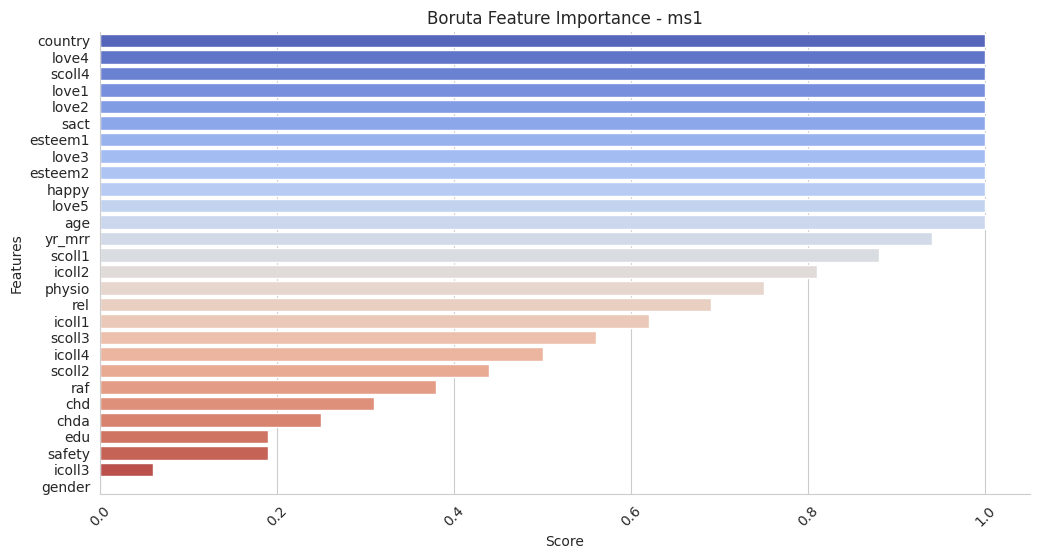

In [67]:
# Plot MS1 Feature Importance
sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Features', data=msone_boruta_score[:], palette='coolwarm')

plt.title("Boruta Feature Importance - ms1")
plt.xlabel("Score")
plt.ylabel("Features")
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [68]:
# Prepare Train Test Set for MS1
X_train, X_test, y_train, y_test = train_test_split(X[msone_boruta_score['Features'][:10]], y, test_size=0.3, random_state=1)

In [69]:
# Naive Bayes Model for MS1
msone_nb_model = create_model(X_train, y_train, 'Naive Bayes')

In [70]:
# KNN Model for MS1
msone_knn_model = create_model(X_train, y_train, 'KNN')

In [71]:
# Random Forest Model for MS1
msone_rf_model = create_model(X_train, y_train, 'Random Forest')

In [72]:
# SVM Model for MS1
msone_svm_model = create_model(X_train, y_train, 'SVM')

In [73]:
# Neural Network Model for MS1
msone_nn_model = create_model(X_train, y_train, 'Neural Network')

In [74]:
print("\nMS1 Naive Bayes Model:")
evaluate_model(msone_nb_model, X_test, y_test)

ms1_accuracy = msone_nb_model.score(X_test, y_test)
ms1_accuracies.append(ms1_accuracy)


MS1 Naive Bayes Model:
Accuracy on test set: 0.823
F1 Score: 0.833

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.47      0.41        96
           1       0.93      0.88      0.91      1766
           2       0.44      0.56      0.49       262

    accuracy                           0.82      2124
   macro avg       0.58      0.64      0.60      2124
weighted avg       0.85      0.82      0.83      2124


Confusion Matrix:
[[  45   30   21]
 [  45 1558  163]
 [  32   84  146]]


In [75]:
print("\nMS1 KNN Model:")
evaluate_model(msone_knn_model, X_test, y_test)

ms1_accuracy = msone_knn_model.score(X_test, y_test)
ms1_accuracies.append(ms1_accuracy)


MS1 KNN Model:
Accuracy on test set: 0.859
F1 Score: 0.837

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33        96
           1       0.89      0.98      0.93      1766
           2       0.53      0.29      0.38       262

    accuracy                           0.86      2124
   macro avg       0.64      0.51      0.55      2124
weighted avg       0.83      0.86      0.84      2124


Confusion Matrix:
[[  24   39   33]
 [   7 1723   36]
 [  17  168   77]]


In [76]:
print("\nMS1 Random Forest Model:")
evaluate_model(msone_rf_model, X_test, y_test)

ms1_accuracy = msone_rf_model.score(X_test, y_test)
ms1_accuracies.append(ms1_accuracy)


MS1 Random Forest Model:
Accuracy on test set: 0.863
F1 Score: 0.849

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.30      0.40        96
           1       0.90      0.96      0.93      1766
           2       0.53      0.39      0.45       262

    accuracy                           0.86      2124
   macro avg       0.67      0.55      0.59      2124
weighted avg       0.84      0.86      0.85      2124


Confusion Matrix:
[[  29   33   34]
 [   8 1702   56]
 [  13  147  102]]


In [77]:
print("\nMS1 Support Vector Machine Model:")
evaluate_model(msone_svm_model, X_test, y_test)

ms1_accuracy = msone_svm_model.score(X_test, y_test)
ms1_accuracies.append(ms1_accuracy)


MS1 Support Vector Machine Model:
Accuracy on test set: 0.847
F1 Score: 0.804

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        96
           1       0.87      0.99      0.93      1766
           2       0.41      0.16      0.23       262

    accuracy                           0.85      2124
   macro avg       0.76      0.40      0.42      2124
weighted avg       0.82      0.85      0.80      2124


Confusion Matrix:
[[   5   44   47]
 [   0 1751   15]
 [   0  219   43]]


In [78]:
print("\nMS1 Neural Network Model:")
evaluate_model(msone_nn_model, X_test, y_test)

ms1_accuracy = msone_nn_model.score(X_test, y_test)
ms1_accuracies.append(ms1_accuracy)


MS1 Neural Network Model:
Accuracy on test set: 0.868
F1 Score: 0.853

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.21      0.33        96
           1       0.91      0.96      0.93      1766
           2       0.55      0.45      0.50       262

    accuracy                           0.87      2124
   macro avg       0.74      0.54      0.59      2124
weighted avg       0.86      0.87      0.85      2124


Confusion Matrix:
[[  20   36   40]
 [   3 1704   59]
 [   3  140  119]]


### MS2

In [79]:
# Prepare data for MS2
X = df.drop(['ms1','ms2','ms3','ms1_category','ms2_category','ms3_category'], axis=1)
y = df["ms2_category"]

In [80]:
# Select features using Boruta
mstwo_boruta_score = select_features(X, y)

print('---------Top 10 MS2 Score----------')
display(mstwo_boruta_score.head(10))

print('\n---------Bottom 10 MS2 Score----------')
display(mstwo_boruta_score.tail(10))

---------Top 10 MS2 Score----------


,Features,Score
0,country,1.0
11,love4,1.0
19,love1,1.0
18,love2,1.0
17,sact,1.0
16,esteem1,1.0
15,love3,1.0
13,esteem2,1.0
12,happy,1.0
14,love5,1.0



---------Bottom 10 MS2 Score----------


,Features,Score
24,icoll1,0.59
4,chd,0.47
9,rel,0.47
21,scoll2,0.35
26,icoll3,0.29
22,scoll3,0.24
10,safety,0.18
20,scoll1,0.12
6,edu,0.06
1,gender,0.00


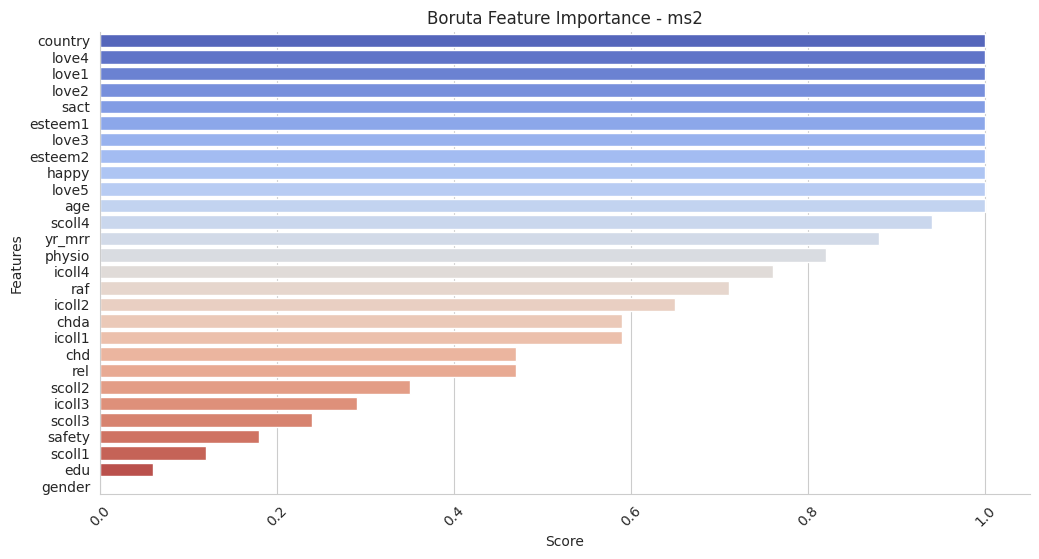

In [81]:
# Plot MS2 Feature Importance
sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Features', data=mstwo_boruta_score[:], palette='coolwarm')

plt.title("Boruta Feature Importance - ms2")
plt.xlabel("Score")
plt.ylabel("Features")
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [82]:
# Prepare Train Test Set for MS2
X_train, X_test, y_train, y_test = train_test_split(X[mstwo_boruta_score['Features'][:10]], y, test_size=0.3, random_state=1)

In [83]:
# Naive Bayes Model for MS2
mstwo_nb_model = create_model(X_train, y_train, 'Naive Bayes')

In [84]:
# KNN Model for MS2
mstwo_knn_model = create_model(X_train, y_train, 'KNN')

In [85]:
# Random Forest Model for MS2
mstwo_rf_model = create_model(X_train, y_train, 'Random Forest')

In [86]:
# SVM Model for MS2
mstwo_svm_model = create_model(X_train, y_train, 'SVM')

In [87]:
# Neural Network Model for MS2
mstwo_nn_model = create_model(X_train, y_train, 'Neural Network')

In [88]:
print("\nMS2 Naive Bayes Model:")
evaluate_model(mstwo_nb_model, X_test, y_test)

ms2_accuracy = mstwo_nb_model.score(X_test, y_test)
ms2_accuracies.append(ms2_accuracy)


MS2 Naive Bayes Model:
Accuracy on test set: 0.819
F1 Score: 0.832

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.48      0.43       110
           1       0.94      0.87      0.91      1780
           2       0.39      0.56      0.46       234

    accuracy                           0.82      2124
   macro avg       0.57      0.64      0.60      2124
weighted avg       0.85      0.82      0.83      2124


Confusion Matrix:
[[  53   33   24]
 [  45 1556  179]
 [  37   67  130]]


In [89]:
print("\nMS2 KNN Model:")
evaluate_model(mstwo_knn_model, X_test, y_test)

ms2_accuracy = mstwo_knn_model.score(X_test, y_test)
ms2_accuracies.append(ms2_accuracy)


MS2 KNN Model:
Accuracy on test set: 0.868
F1 Score: 0.851

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.30      0.40       110
           1       0.90      0.97      0.93      1780
           2       0.54      0.35      0.42       234

    accuracy                           0.87      2124
   macro avg       0.69      0.54      0.59      2124
weighted avg       0.85      0.87      0.85      2124


Confusion Matrix:
[[  33   50   27]
 [   9 1728   43]
 [  11  141   82]]


In [90]:
print("\nMS2 Random Forest Model:")
evaluate_model(mstwo_rf_model, X_test, y_test)

ms2_accuracy = mstwo_rf_model.score(X_test, y_test)
ms2_accuracies.append(ms2_accuracy)


MS2 Random Forest Model:
Accuracy on test set: 0.856
F1 Score: 0.844

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.32      0.43       110
           1       0.90      0.96      0.93      1780
           2       0.45      0.35      0.40       234

    accuracy                           0.86      2124
   macro avg       0.67      0.54      0.58      2124
weighted avg       0.84      0.86      0.84      2124


Confusion Matrix:
[[  35   45   30]
 [   8 1701   71]
 [  11  140   83]]


In [91]:
print("\nMS2 Support Vector Machine Model:")
evaluate_model(mstwo_svm_model, X_test, y_test)

ms2_accuracy = mstwo_svm_model.score(X_test, y_test)
ms2_accuracies.append(ms2_accuracy)


MS2 Support Vector Machine Model:
Accuracy on test set: 0.857
F1 Score: 0.819

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.19      0.31       110
           1       0.88      0.99      0.93      1780
           2       0.42      0.15      0.22       234

    accuracy                           0.86      2124
   macro avg       0.70      0.44      0.49      2124
weighted avg       0.82      0.86      0.82      2124


Confusion Matrix:
[[  21   56   33]
 [   1 1764   15]
 [   4  195   35]]


In [92]:
print("\nMS2 Neural Network Model:")
evaluate_model(mstwo_nn_model, X_test, y_test)

ms2_accuracy = mstwo_nn_model.score(X_test, y_test)
ms2_accuracies.append(ms2_accuracy)


MS2 Neural Network Model:
Accuracy on test set: 0.863
F1 Score: 0.843

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.23      0.33       110
           1       0.90      0.97      0.94      1780
           2       0.47      0.32      0.38       234

    accuracy                           0.86      2124
   macro avg       0.66      0.51      0.55      2124
weighted avg       0.84      0.86      0.84      2124


Confusion Matrix:
[[  25   44   41]
 [   4 1733   43]
 [  12  148   74]]


### MS3

In [93]:
# Prepare data for MS3
X = df.drop(['ms1','ms2','ms3','ms1_category','ms2_category','ms3_category'], axis=1)
y = df["ms3_category"]

In [94]:
# Select features using Boruta
msthree_boruta_score = select_features(X, y)

print('---------Top 10 MS3 Score----------')
display(msthree_boruta_score.head(10))

print('\n---------Bottom 10 MS3 Score----------')
display(msthree_boruta_score.tail(10))

---------Top 10 MS3 Score----------


,Features,Score
0,country,1.0
11,love4,1.0
19,love1,1.0
18,love2,1.0
17,sact,1.0
16,esteem1,1.0
15,love3,1.0
13,esteem2,1.0
12,happy,1.0
14,love5,1.0



---------Bottom 10 MS3 Score----------


,Features,Score
9,rel,0.56
24,icoll1,0.50
10,safety,0.50
5,chda,0.38
4,chd,0.25
20,scoll1,0.25
8,raf,0.25
6,edu,0.12
26,icoll3,0.06
1,gender,0.00


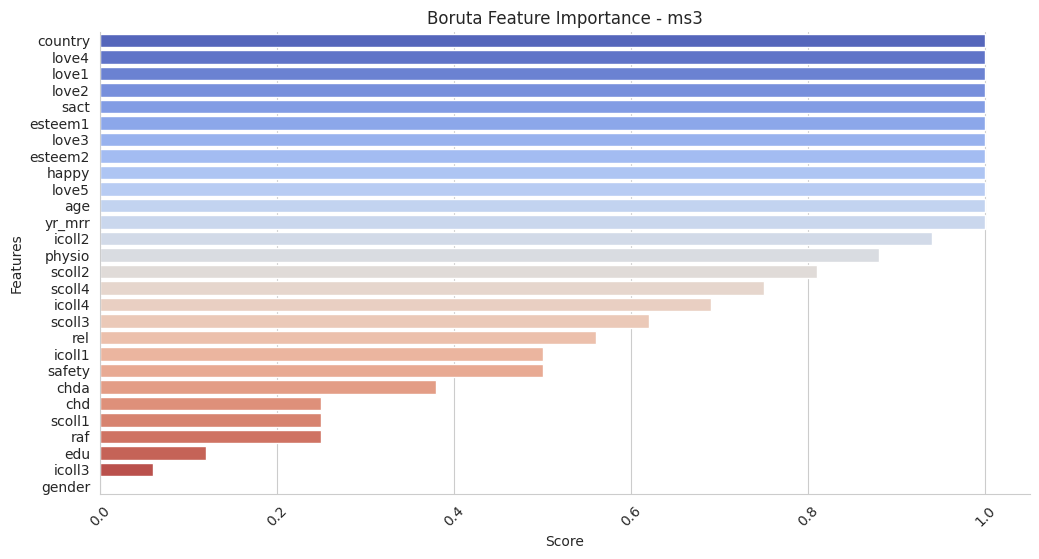

In [95]:
# Plot MS3 Feature Importance
sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Features', data=msthree_boruta_score[:], palette='coolwarm')

plt.title("Boruta Feature Importance - ms3")
plt.xlabel("Score")
plt.ylabel("Features")
plt.xticks(rotation=45)
sns.despine()
plt.show()

In [96]:
# Prepare Train Test Set for MS3
X_train, X_test, y_train, y_test = train_test_split(X[msthree_boruta_score['Features'][:10]], y, test_size=0.3, random_state=1)

In [97]:
# Naive Bayes Model for MS3
msthree_nb_model = create_model(X_train, y_train, 'Naive Bayes')

In [98]:
# KNN Model for MS3
msthree_knn_model = create_model(X_train, y_train, 'KNN')

In [99]:
# Random Forest Model for MS3
msthree_rf_model = create_model(X_train, y_train, 'Random Forest')

In [100]:
# SVM Model for MS3
msthree_svm_model = create_model(X_train, y_train, 'SVM')

In [101]:
# Neural Network Model for MS3
msthree_nn_model = create_model(X_train, y_train, 'Neural Network')

In [102]:
print("\nMS3 Naive Bayes Model:")
evaluate_model(msthree_nb_model, X_test, y_test)

ms3_accuracy = msthree_nb_model.score(X_test, y_test)
ms3_accuracies.append(ms3_accuracy)


MS3 Naive Bayes Model:
Accuracy on test set: 0.818
F1 Score: 0.832

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.51      0.48       117
           1       0.94      0.87      0.90      1767
           2       0.39      0.59      0.47       240

    accuracy                           0.82      2124
   macro avg       0.59      0.66      0.62      2124
weighted avg       0.85      0.82      0.83      2124


Confusion Matrix:
[[  60   32   25]
 [  35 1535  197]
 [  38   60  142]]


In [103]:
print("\nMS3 KNN Model:")
evaluate_model(msthree_knn_model, X_test, y_test)

ms3_accuracy = msthree_knn_model.score(X_test, y_test)
ms3_accuracies.append(ms3_accuracy)


MS3 KNN Model:
Accuracy on test set: 0.863
F1 Score: 0.843

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.30      0.40       117
           1       0.90      0.97      0.93      1767
           2       0.53      0.32      0.40       240

    accuracy                           0.86      2124
   macro avg       0.68      0.53      0.58      2124
weighted avg       0.84      0.86      0.84      2124


Confusion Matrix:
[[  35   51   31]
 [  10 1720   37]
 [  13  150   77]]


In [104]:
print("\nMS3 Random Forest Model:")
evaluate_model(msthree_rf_model, X_test, y_test)

ms3_accuracy = msthree_rf_model.score(X_test, y_test)
ms3_accuracies.append(ms3_accuracy)


MS3 Random Forest Model:
Accuracy on test set: 0.857
F1 Score: 0.847

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.34      0.43       117
           1       0.91      0.95      0.93      1767
           2       0.48      0.39      0.43       240

    accuracy                           0.86      2124
   macro avg       0.65      0.56      0.60      2124
weighted avg       0.84      0.86      0.85      2124


Confusion Matrix:
[[  40   43   34]
 [  13 1687   67]
 [  17  129   94]]


In [105]:
print("\nMS3 Support Vector Machine Model:")
evaluate_model(msthree_svm_model, X_test, y_test)

ms3_accuracy = msthree_svm_model.score(X_test, y_test)
ms3_accuracies.append(ms3_accuracy)


MS3 Support Vector Machine Model:
Accuracy on test set: 0.851
F1 Score: 0.807

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.21      0.32       117
           1       0.86      0.99      0.92      1767
           2       0.50      0.11      0.18       240

    accuracy                           0.85      2124
   macro avg       0.69      0.44      0.48      2124
weighted avg       0.81      0.85      0.81      2124


Confusion Matrix:
[[  24   74   19]
 [   2 1757    8]
 [   8  205   27]]


In [106]:
print("\nMS3 Neural Network Model:")
evaluate_model(msthree_nn_model, X_test, y_test)

ms3_accuracy = msthree_nn_model.score(X_test, y_test)
ms3_accuracies.append(ms3_accuracy)


MS3 Neural Network Model:
Accuracy on test set: 0.857
F1 Score: 0.847

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.28      0.40       117
           1       0.91      0.95      0.93      1767
           2       0.46      0.43      0.45       240

    accuracy                           0.86      2124
   macro avg       0.70      0.56      0.59      2124
weighted avg       0.85      0.86      0.85      2124


Confusion Matrix:
[[  33   39   45]
 [   6 1684   77]
 [   7  129  104]]


## Model Accuracy Comparison

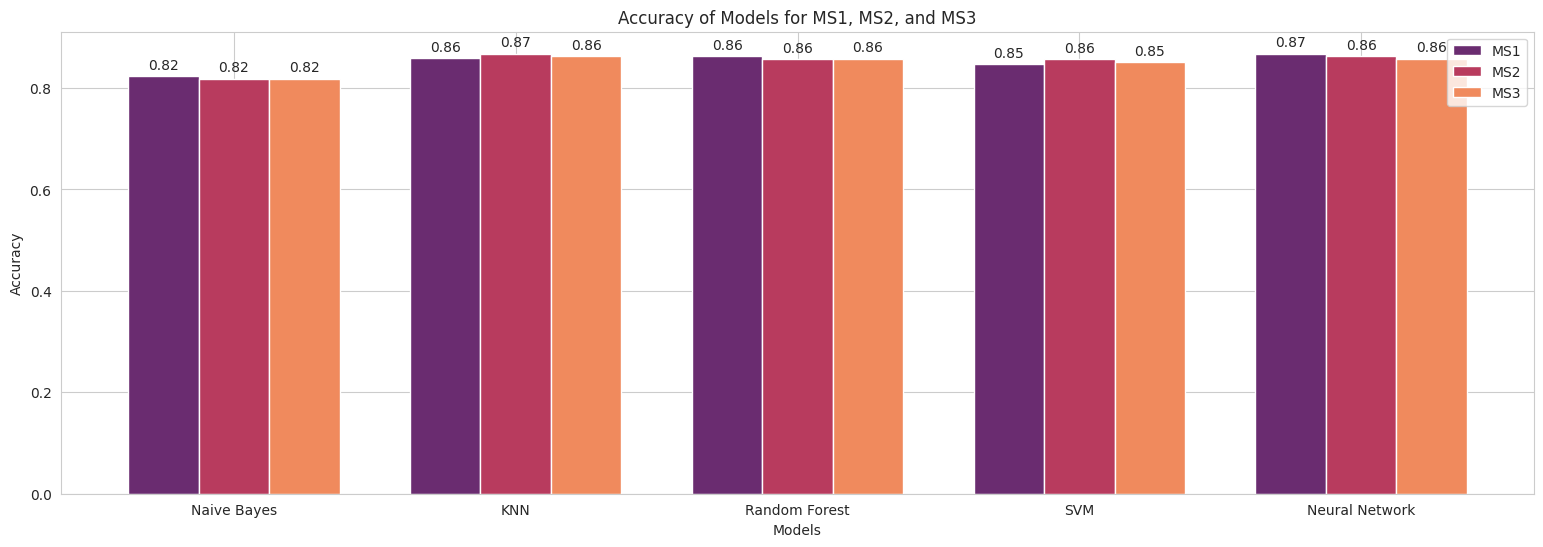

In [107]:
models = ['Naive Bayes', 'KNN', 'Random Forest', 'SVM', 'Neural Network']
x = np.arange(len(models))
width = 0.25

colors = ['#6A2C70', '#B83B5E', '#F08A5D']

fig, ax = plt.subplots(figsize=(19, 6))
rects1 = ax.bar(x - width, ms1_accuracies, width=width, label='MS1', color=colors[0])
rects2 = ax.bar(x, ms2_accuracies, width=width, label='MS2', color=colors[1])
rects3 = ax.bar(x + width, ms3_accuracies, width=width, label='MS3', color=colors[2])

# Add annotations on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models for MS1, MS2, and MS3')
plt.xticks(x, models)
plt.legend()
plt.show()
